In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Set the plot style
sns.set(style="whitegrid")

# Create a 1x3 subplot figure for the three periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Before Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_before_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[0], ci=95)
axes[0].set_title('Before Fire')
axes[0].set_xlabel('CO (mg/m³)')
axes[0].set_ylabel('PM2.5 (µg/m³)')

# During Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_during_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[1], ci=95)
axes[1].set_title('During Fire')
axes[1].set_xlabel('CO (mg/m³)')
axes[1].set_ylabel('PM2.5 (µg/m³)')

# After Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_after_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[2], ci=95)
axes[2].set_title('After Fire')
axes[2].set_xlabel('CO (mg/m³)')
axes[2].set_ylabel('PM2.5 (µg/m³)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


ValueError: time data "Prescribed Standards" doesn't match format "%d-%m-%Y %H:%M", at position 27699. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Function to remove negative values and outliers using IQR
def remove_outliers(df, column):
    # Remove negative values
    df = df[df[column] >= 0]
    
    # Calculate IQR for outlier removal
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers (1.5 * IQR rule)
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Remove outliers and negative values for both PM2.5 and CO
df_before_fire = remove_outliers(df_before_fire, 'PM2.5')
df_before_fire = remove_outliers(df_before_fire, 'CO')

df_during_fire = remove_outliers(df_during_fire, 'PM2.5')
df_during_fire = remove_outliers(df_during_fire, 'CO')

df_after_fire = remove_outliers(df_after_fire, 'PM2.5')
df_after_fire = remove_outliers(df_after_fire, 'CO')

# Set the plot style
sns.set(style="whitegrid")

# Create a 1x3 subplot figure for the three periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Before Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_before_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[0], ci=95)
axes[0].set_title('Before Fire')
axes[0].set_xlabel('CO (mg/m³)')
axes[0].set_ylabel('PM2.5 (µg/m³)')

# During Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_during_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[1], ci=95)
axes[1].set_title('During Fire')
axes[1].set_xlabel('CO (mg/m³)')
axes[1].set_ylabel('PM2.5 (µg/m³)')

# After Fire Plot
sns.regplot(y='PM2.5', x='CO', data=df_after_fire, scatter_kws={'s':50}, line_kws={'lw':2}, ax=axes[2], ci=95)
axes[2].set_title('After Fire')
axes[2].set_xlabel('CO (mg/m³)')
axes[2].set_ylabel('PM2.5 (µg/m³)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


ValueError: time data "Prescribed Standards" doesn't match format "%d-%m-%Y %H:%M", at position 27699. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

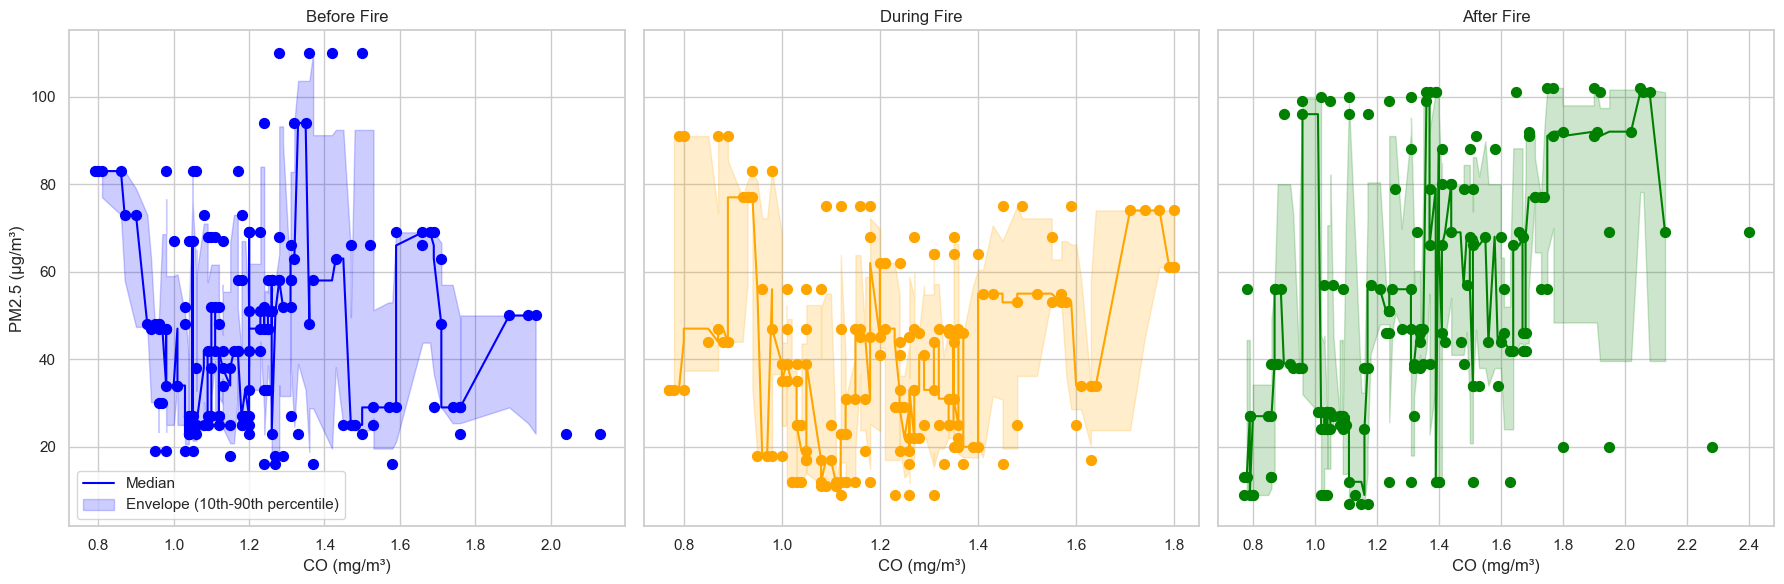

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Function to remove negative values and outliers using IQR
def remove_outliers(df, column):
    # Remove negative values
    df = df[df[column] >= 0]
    
    # Calculate IQR for outlier removal
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers (1.5 * IQR rule)
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Remove outliers and negative values for both PM2.5 and CO
df_before_fire = remove_outliers(df_before_fire, 'PM2.5')
df_before_fire = remove_outliers(df_before_fire, 'CO')

df_during_fire = remove_outliers(df_during_fire, 'PM2.5')
df_during_fire = remove_outliers(df_during_fire, 'CO')

df_after_fire = remove_outliers(df_after_fire, 'PM2.5')
df_after_fire = remove_outliers(df_after_fire, 'CO')

# Function to create an approximate envelope using quantiles
def envelope_method(df, x_col, y_col, window=5):
    df = df.sort_values(by=x_col)
    
    # Calculate rolling quantiles for the envelope
    df['rolling_median'] = df[y_col].rolling(window=window, center=True).median()
    df['lower_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.1)
    df['upper_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.9)
    
    return df

# Apply the envelope method to each period
df_before_fire = envelope_method(df_before_fire, 'CO', 'PM2.5')
df_during_fire = envelope_method(df_during_fire, 'CO', 'PM2.5')
df_after_fire = envelope_method(df_after_fire, 'CO', 'PM2.5')

# Set the plot style
sns.set(style="whitegrid")

# Create a 1x3 subplot figure for the three periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Before Fire Plot
axes[0].plot(df_before_fire['CO'], df_before_fire['rolling_median'], color='blue', label='Median')
axes[0].fill_between(df_before_fire['CO'], df_before_fire['lower_bound'], df_before_fire['upper_bound'], 
                     color='blue', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[0].scatter(df_before_fire['CO'], df_before_fire['PM2.5'], s=50, color='blue')
axes[0].set_title('Before Fire')
axes[0].set_xlabel('CO (mg/m³)')
axes[0].set_ylabel('PM2.5 (µg/m³)')

# During Fire Plot
axes[1].plot(df_during_fire['CO'], df_during_fire['rolling_median'], color='orange', label='Median')
axes[1].fill_between(df_during_fire['CO'], df_during_fire['lower_bound'], df_during_fire['upper_bound'], 
                     color='orange', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[1].scatter(df_during_fire['CO'], df_during_fire['PM2.5'], s=50, color='orange')
axes[1].set_title('During Fire')
axes[1].set_xlabel('CO (mg/m³)')

# After Fire Plot
axes[2].plot(df_after_fire['CO'], df_after_fire['rolling_median'], color='green', label='Median')
axes[2].fill_between(df_after_fire['CO'], df_after_fire['lower_bound'], df_after_fire['upper_bound'], 
                     color='green', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[2].scatter(df_after_fire['CO'], df_after_fire['PM2.5'], s=50, color='green')
axes[2].set_title('After Fire')
axes[2].set_xlabel('CO (mg/m³)')

# Add a legend to the first subplot
axes[0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


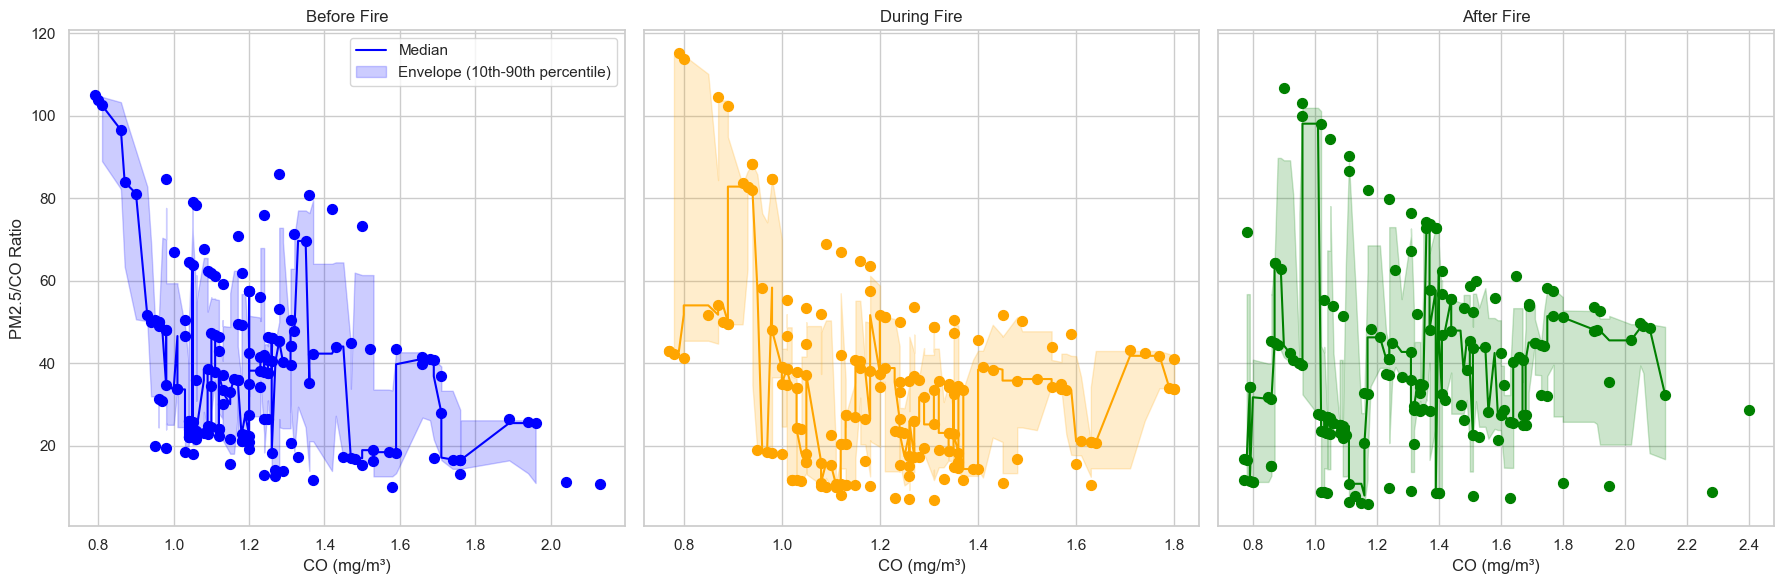

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Function to remove negative values and outliers using IQR
def remove_outliers(df, column):
    # Remove negative values
    df = df[df[column] > 0]  # Ensure CO and PM2.5 are positive for ratio calculation
    
    # Calculate IQR for outlier removal
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers (1.5 * IQR rule)
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Remove outliers and negative values for both PM2.5 and CO
df_before_fire = remove_outliers(df_before_fire, 'PM2.5')
df_before_fire = remove_outliers(df_before_fire, 'CO')

df_during_fire = remove_outliers(df_during_fire, 'PM2.5')
df_during_fire = remove_outliers(df_during_fire, 'CO')

df_after_fire = remove_outliers(df_after_fire, 'PM2.5')
df_after_fire = remove_outliers(df_after_fire, 'CO')

# Calculate the PM2.5/CO ratio for each period
df_before_fire['PM2.5/CO'] = df_before_fire['PM2.5'] / df_before_fire['CO']
df_during_fire['PM2.5/CO'] = df_during_fire['PM2.5'] / df_during_fire['CO']
df_after_fire['PM2.5/CO'] = df_after_fire['PM2.5'] / df_after_fire['CO']

# Function to create an approximate envelope using quantiles
def envelope_method(df, x_col, y_col, window=5):
    df = df.sort_values(by=x_col)
    
    # Calculate rolling quantiles for the envelope
    df['rolling_median'] = df[y_col].rolling(window=window, center=True).median()
    df['lower_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.1)
    df['upper_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.9)
    
    return df

# Apply the envelope method to each period for the PM2.5/CO ratio
df_before_fire = envelope_method(df_before_fire, 'CO', 'PM2.5/CO')
df_during_fire = envelope_method(df_during_fire, 'CO', 'PM2.5/CO')
df_after_fire = envelope_method(df_after_fire, 'CO', 'PM2.5/CO')

# Set the plot style
sns.set(style="whitegrid")

# Create a 1x3 subplot figure for the three periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Before Fire Plot
axes[0].plot(df_before_fire['CO'], df_before_fire['rolling_median'], color='blue', label='Median')
axes[0].fill_between(df_before_fire['CO'], df_before_fire['lower_bound'], df_before_fire['upper_bound'], 
                     color='blue', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[0].scatter(df_before_fire['CO'], df_before_fire['PM2.5/CO'], s=50, color='blue')
axes[0].set_title('Before Fire')
axes[0].set_xlabel('CO (mg/m³)')
axes[0].set_ylabel('PM2.5/CO Ratio')

# During Fire Plot
axes[1].plot(df_during_fire['CO'], df_during_fire['rolling_median'], color='orange', label='Median')
axes[1].fill_between(df_during_fire['CO'], df_during_fire['lower_bound'], df_during_fire['upper_bound'], 
                     color='orange', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[1].scatter(df_during_fire['CO'], df_during_fire['PM2.5/CO'], s=50, color='orange')
axes[1].set_title('During Fire')
axes[1].set_xlabel('CO (mg/m³)')

# After Fire Plot
axes[2].plot(df_after_fire['CO'], df_after_fire['rolling_median'], color='green', label='Median')
axes[2].fill_between(df_after_fire['CO'], df_after_fire['lower_bound'], df_after_fire['upper_bound'], 
                     color='green', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[2].scatter(df_after_fire['CO'], df_after_fire['PM2.5/CO'], s=50, color='green')
axes[2].set_title('After Fire')
axes[2].set_xlabel('CO (mg/m³)')

# Add a legend to the first subplot
axes[0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


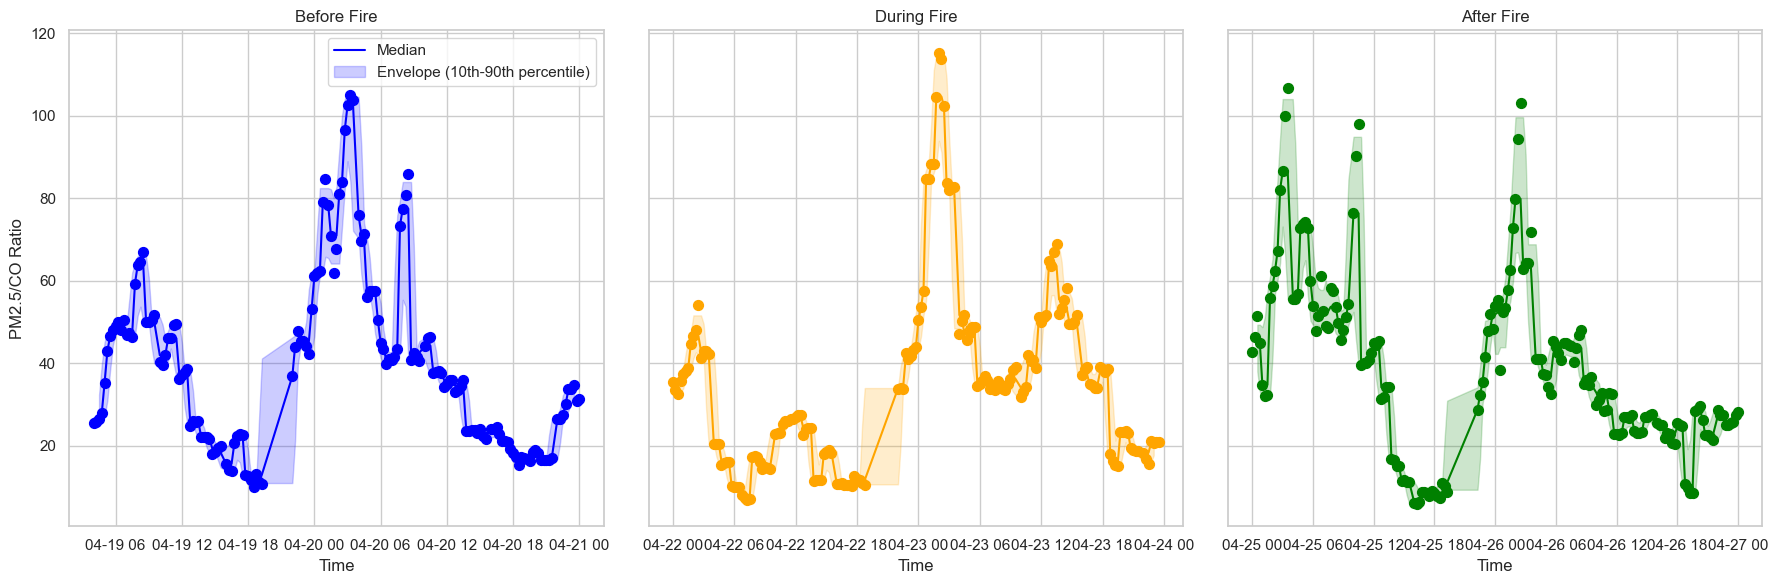

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the central date for the fire event
central_date = pd.Timestamp('2024-04-22')

# Define date ranges for before, during, and after the fire
before_fire_start = central_date - pd.Timedelta(days=3)
before_fire_end = central_date - pd.Timedelta(days=1)

during_fire_start = central_date
during_fire_end = central_date + pd.Timedelta(days=2)

after_fire_start = central_date + pd.Timedelta(days=3)
after_fire_end = central_date + pd.Timedelta(days=5)

# Filter data for each period
df_before_fire = df[(df['From Date'] >= before_fire_start) & (df['From Date'] <= before_fire_end)]
df_during_fire = df[(df['From Date'] >= during_fire_start) & (df['From Date'] <= during_fire_end)]
df_after_fire = df[(df['From Date'] >= after_fire_start) & (df['From Date'] <= after_fire_end)]

# Function to remove negative values and outliers using IQR
def remove_outliers(df, column):
    df = df[df[column] > 0]  # Remove negative values
    
    # IQR for outlier removal
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered

# Remove outliers and negative values for both PM2.5 and CO
df_before_fire = remove_outliers(df_before_fire, 'PM2.5')
df_before_fire = remove_outliers(df_before_fire, 'CO')

df_during_fire = remove_outliers(df_during_fire, 'PM2.5')
df_during_fire = remove_outliers(df_during_fire, 'CO')

df_after_fire = remove_outliers(df_after_fire, 'PM2.5')
df_after_fire = remove_outliers(df_after_fire, 'CO')

# Calculate the PM2.5/CO ratio for each period
df_before_fire['PM2.5/CO'] = df_before_fire['PM2.5'] / df_before_fire['CO']
df_during_fire['PM2.5/CO'] = df_during_fire['PM2.5'] / df_during_fire['CO']
df_after_fire['PM2.5/CO'] = df_after_fire['PM2.5'] / df_after_fire['CO']

# Function to create an envelope using rolling quantiles
def envelope_method(df, x_col, y_col, window=5):
    df = df.sort_values(by=x_col)
    
    # Calculate rolling quantiles for the envelope
    df['rolling_median'] = df[y_col].rolling(window=window, center=True).median()
    df['lower_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.1)
    df['upper_bound'] = df[y_col].rolling(window=window, center=True).quantile(0.9)
    
    return df

# Apply the envelope method to each period for the PM2.5/CO ratio
df_before_fire = envelope_method(df_before_fire, 'From Date', 'PM2.5/CO')
df_during_fire = envelope_method(df_during_fire, 'From Date', 'PM2.5/CO')
df_after_fire = envelope_method(df_after_fire, 'From Date', 'PM2.5/CO')

# Set the plot style
sns.set(style="whitegrid")

# Create a 1x3 subplot figure for the three periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Before Fire Plot
axes[0].plot(df_before_fire['From Date'], df_before_fire['rolling_median'], color='blue', label='Median')
axes[0].fill_between(df_before_fire['From Date'], df_before_fire['lower_bound'], df_before_fire['upper_bound'], 
                     color='blue', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[0].scatter(df_before_fire['From Date'], df_before_fire['PM2.5/CO'], s=50, color='blue')
axes[0].set_title('Before Fire')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('PM2.5/CO Ratio')

# During Fire Plot
axes[1].plot(df_during_fire['From Date'], df_during_fire['rolling_median'], color='orange', label='Median')
axes[1].fill_between(df_during_fire['From Date'], df_during_fire['lower_bound'], df_during_fire['upper_bound'], 
                     color='orange', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[1].scatter(df_during_fire['From Date'], df_during_fire['PM2.5/CO'], s=50, color='orange')
axes[1].set_title('During Fire')
axes[1].set_xlabel('Time')

# After Fire Plot
axes[2].plot(df_after_fire['From Date'], df_after_fire['rolling_median'], color='green', label='Median')
axes[2].fill_between(df_after_fire['From Date'], df_after_fire['lower_bound'], df_after_fire['upper_bound'], 
                     color='green', alpha=0.2, label='Envelope (10th-90th percentile)')
axes[2].scatter(df_after_fire['From Date'], df_after_fire['PM2.5/CO'], s=50, color='green')
axes[2].set_title('After Fire')
axes[2].set_xlabel('Time')

# Add a legend to the first subplot
axes[0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


From Date    datetime64[ns]
To Date              object
PM2.5               float64
PM10                float64
NO                  float64
NO2                 float64
NOx                 float64
NH3                 float64
SO2                 float64
CO                  float64
Ozone               float64
Benzene             float64
Toluene             float64
Temp                float64
RH                  float64
WS                  float64
WD                  float64
SR                  float64
BP                  float64
VWS                 float64
AT                  float64
RF                  float64
dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1397392772.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H', on='From Date').mean(numeric_only=True).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1397392772.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='From Date', y='PM2.5', data=df_hourly, ci=95, label='Hourly Averaged PM2.5', color='blue')


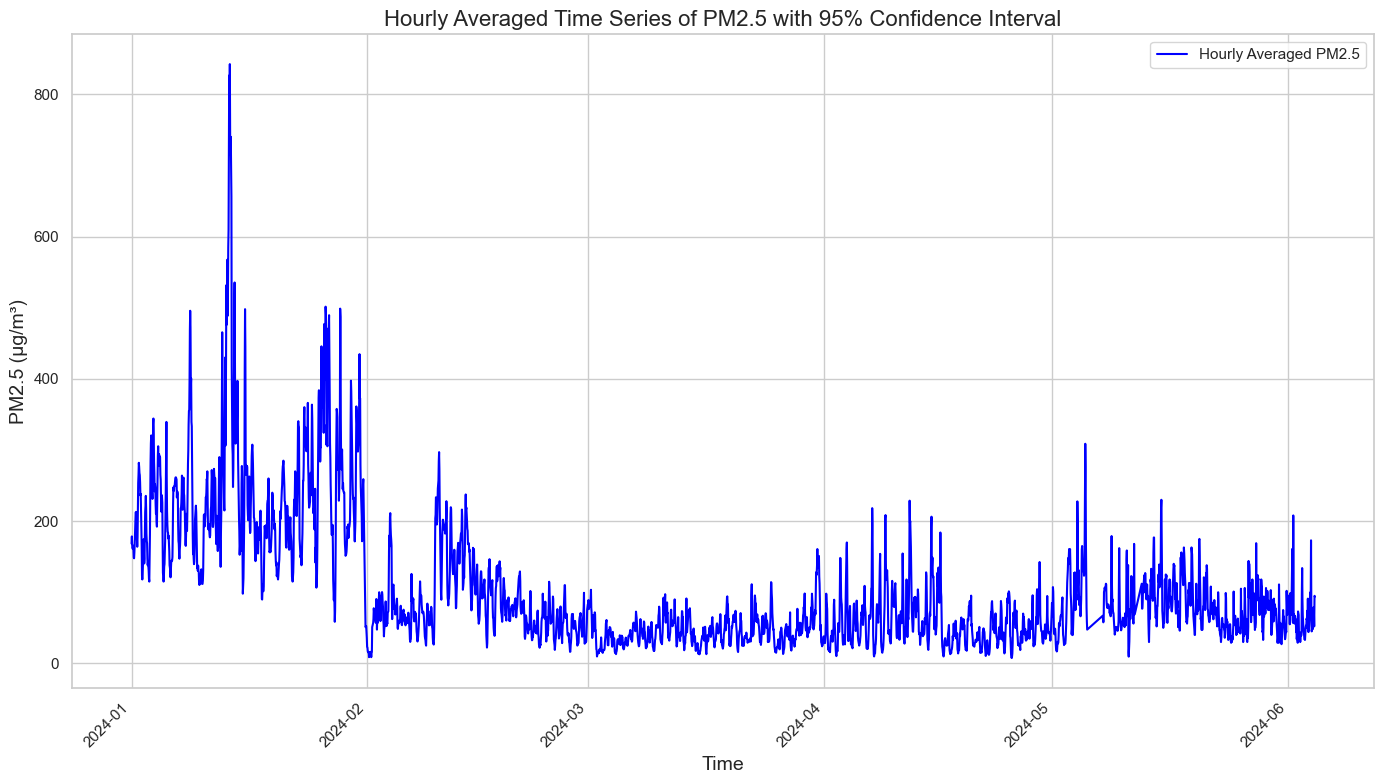

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Ensure that PM2.5 column contains only numeric values and coerce errors
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows with NaN values in PM2.5
df = df.dropna(subset=['PM2.5'])

# Remove any negative PM2.5 values as outliers
df = df[df['PM2.5'] >= 0]

# Check the data types to ensure PM2.5 is numeric
print(df.dtypes)

# Resample the data to hourly intervals and calculate the mean of PM2.5 for each hour
df_hourly = df.resample('H', on='From Date').mean(numeric_only=True).reset_index()

# Create the plot
plt.figure(figsize=(14, 8))

# Plotting with Seaborn's lineplot for confidence intervals
sns.lineplot(x='From Date', y='PM2.5', data=df_hourly, ci=95, label='Hourly Averaged PM2.5', color='blue')

# Adding labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('PM2.5 (µg/m³)', fontsize=14)
plt.title('Hourly Averaged Time Series of PM2.5 with 95% Confidence Interval', fontsize=16)

# Formatting the x-axis for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load the specific sheet from the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur/Patparganj_2024.xlsx'
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime with the correct format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Group by date and check if all PM2.5 values are less than 60
days_with_all_pm25_less_than_60 = df.groupby(df['From Date'].dt.date)['PM2.5'].max() < 60

# Get the dates where all PM2.5 values are less than 60
valid_days = days_with_all_pm25_less_than_60[days_with_all_pm25_less_than_60].index.tolist()

# Print the valid days
print("Days where all PM2.5 data points are less than 60:")
for date in valid_days:
    print(date)


Days where all PM2.5 data points are less than 60:
2024-03-02
2024-03-04
2024-03-05
2024-03-06
2024-03-09
2024-03-15
2024-03-16
2024-03-26
2024-04-21


In [17]:
df['From Date']

0       2024-01-01 00:00:00
1       2024-01-01 00:15:00
2       2024-01-01 00:30:00
3       2024-01-01 00:45:00
4       2024-01-01 01:00:00
                ...        
14924   2024-06-04 11:00:00
14925   2024-06-04 11:15:00
14926   2024-06-04 11:30:00
14927   2024-06-04 11:45:00
14928   2024-06-04 12:00:00
Name: From Date, Length: 14929, dtype: datetime64[ns]

In [23]:
import pandas as pd

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the specific dates to filter
specific_dates = pd.to_datetime([
    '2024-03-02',
    '2024-03-04',
    '2024-03-05',
    '2024-03-06',
    '2024-03-09',
    '2024-03-15',
    '2024-03-16',
    '2024-03-26'
])

# Filter the DataFrame to get all data points for each specific date
# Convert the specific dates to date-only format
specific_dates_only = specific_dates.date

# Create a boolean mask for filtering
mask = df['From Date'].dt.date.isin(specific_dates_only)

# Filter the DataFrame
filtered_df = df[mask]

# Display the resulting DataFrame
print(filtered_df)


               From Date           To Date  PM2.5   PM10    NO   NO2   NOx  \
5856 2024-03-02 00:00:00  02-03-2024 00:15   50.0  155.0   7.2  34.3  24.2   
5857 2024-03-02 00:15:00  02-03-2024 00:30   50.0  155.0   7.1  34.6  24.1   
5858 2024-03-02 00:30:00  02-03-2024 00:45   50.0  155.0   6.8  35.4  24.4   
5859 2024-03-02 00:45:00  02-03-2024 01:00   36.0  118.0   6.3  36.0  24.3   
5860 2024-03-02 01:00:00  02-03-2024 01:15   36.0  118.0   5.8  36.2  24.0   
...                  ...               ...    ...    ...   ...   ...   ...   
8251 2024-03-26 22:45:00  26-03-2024 23:00   52.0  238.0  26.6  48.0  47.2   
8252 2024-03-26 23:00:00  26-03-2024 23:15   52.0  238.0  29.6  49.0  50.1   
8253 2024-03-26 23:15:00  26-03-2024 23:30   52.0  238.0  30.3  49.5  51.0   
8254 2024-03-26 23:30:00  26-03-2024 23:45   52.0  238.0  29.3  48.2  49.5   
8255 2024-03-26 23:45:00  27-03-2024 00:00   52.0  274.0  31.5  47.7  51.0   

       NH3   SO2    CO  ...  Toluene  Temp    RH   WS   WD    S

In [24]:
filtered_df['PM2.5'].max()

np.float64(59.0)

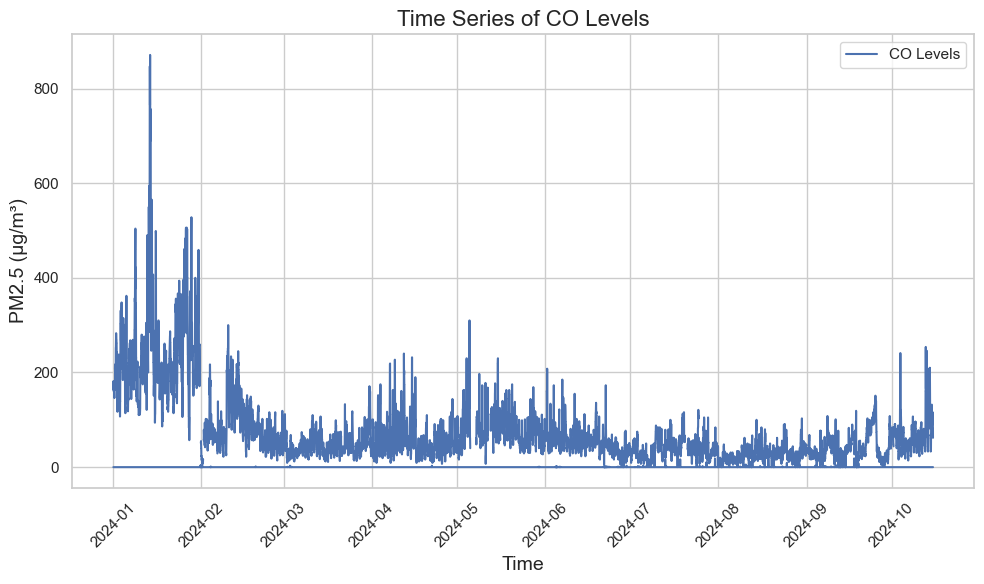

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format, coercing errors
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True, errors='coerce')

# Filter out rows where 'From Date' is NaT (invalid dates)
df_cleaned = df.dropna(subset=['From Date'])

# Extract the CO values and valid 'From Date' (time)
co = df_cleaned['PM2.5']
time = df_cleaned['From Date']

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(time, co, color='b', label='CO Levels')

# Set plot labels and title
plt.title('Time Series of CO Levels', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('PM2.5 (µg/m³)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


                From Date           To Date  PM2.5   PM10   NO   NO2   NOx  \
2563  2024-01-27 16:45:00  27-01-2024 17:00   57.0  178.0  2.5  39.2  22.8   
2564  2024-01-27 17:00:00  27-01-2024 17:15   57.0  178.0  2.8  41.0  24.1   
2565  2024-01-27 17:15:00  27-01-2024 17:30   57.0  178.0  3.4  40.0  24.1   
2566  2024-01-27 17:30:00  27-01-2024 17:45   57.0  178.0  3.2  39.8  23.8   
2567  2024-01-27 17:45:00  27-01-2024 18:00   63.0  161.0  3.2  43.8  25.9   
...                   ...               ...    ...    ...  ...   ...   ...   
52836 2024-09-18 19:15:00  18-09-2024 19:30    2.5    NaN  NaN   NaN   NaN   
52858 2024-09-19 00:45:00  19-09-2024 01:00    5.5    NaN  NaN   NaN   NaN   
52859 2024-09-19 01:00:00  19-09-2024 01:15    6.5    NaN  NaN   NaN   NaN   
52864 2024-09-19 02:15:00  19-09-2024 02:30    1.5    NaN  NaN   NaN   NaN   
52879 2024-09-19 06:00:00  19-09-2024 06:15    8.0    NaN  NaN   NaN   NaN   

        NH3  SO2    CO  ...  Toluene  Temp    RH   WS     WD   

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\455533943.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pm25['Hour'] = filtered_pm25['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\455533943.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\455533943.py:26: FutureWarning: The default of observed=False is deprecated and 

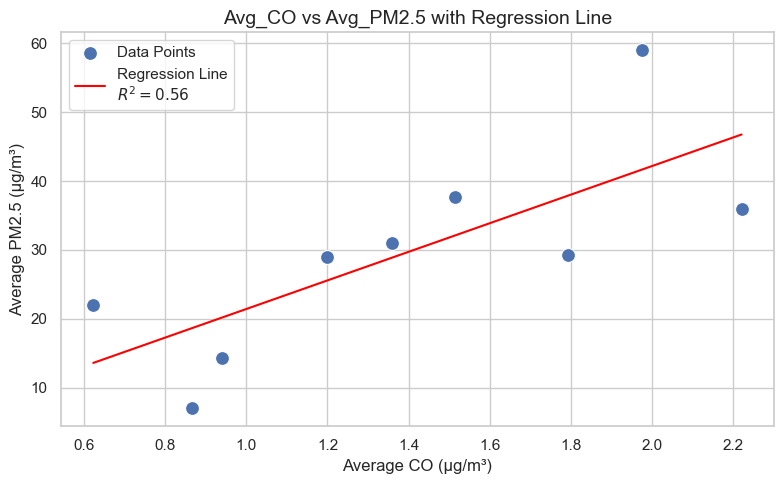

In [141]:
# Convert 'PM2.5' column to numeric, forcing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Filter the DataFrame for rows where PM2.5 is less than 70
filtered_pm25 = df[(df['PM2.5'] < 70) & (df['PM2.5'] != 0)]

# Display the filtered data
print(filtered_pm25)
# Extract the hour from the 'From Date' column
filtered_pm25['Hour'] = filtered_pm25['From Date'].dt.hour

# Create a mask to filter for the 00:00 - 02:00 time interval
time_mask = (filtered_pm25['Hour'] >= 0) & (filtered_pm25['Hour'] < 2)

# Filter the DataFrame for the 00:00 - 02:00 time interval
filtered_time_df = filtered_pm25[time_mask]

# Display the resulting DataFrame
print(filtered_time_df)
filtered_df=filtered_time_df
bins = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7,1.9,2.1,2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]
filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

# Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
avg_data = filtered_df.groupby('CO_bin').apply(
    lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

# Rename columns for clarity
avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

# Filter out NaN values
avg_data_cleaned = avg_data.dropna()

# Calculate the regression line (linear fit) and R^2 value
x = avg_data_cleaned['Avg_CO']
y = avg_data_cleaned['Avg_PM2.5']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept
r_squared = np.corrcoef(x, y)[0, 1] ** 2

# Create scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

# Add title and labels
plt.title('Avg_CO vs Avg_PM2.5 with Regression Line', fontsize=14)
plt.xlabel('Average CO (µg/m³)', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

# Display legend and plot
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

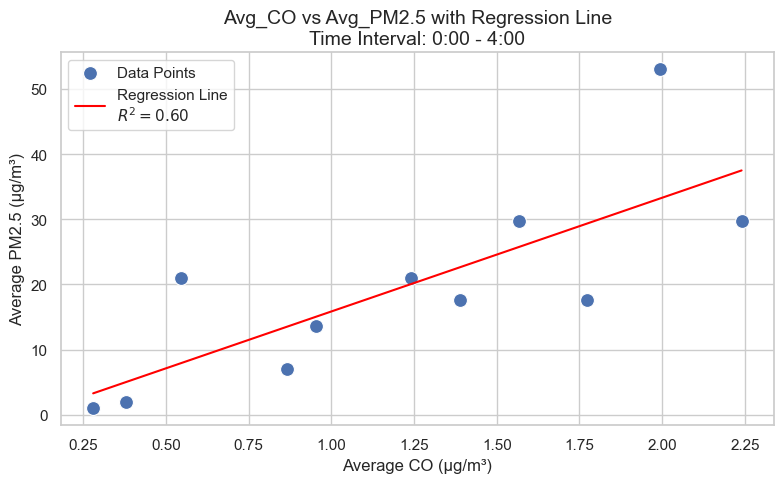

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

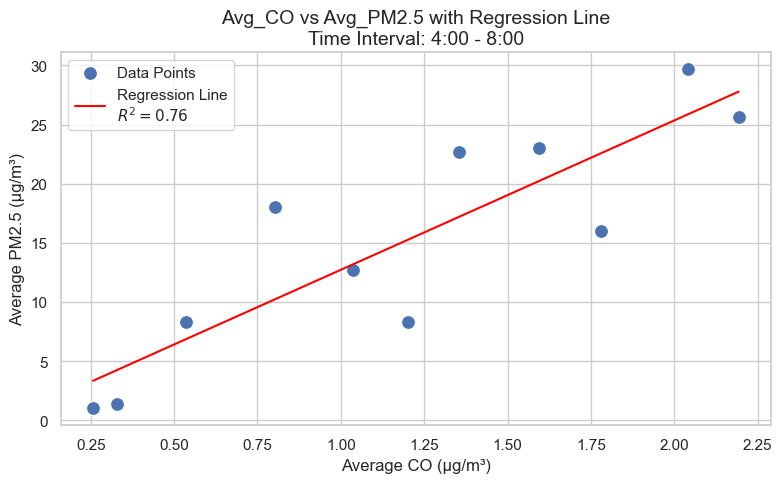

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

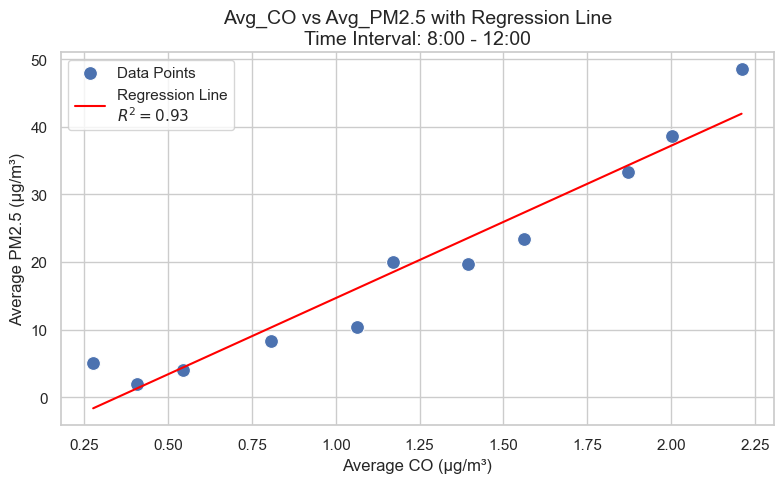

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

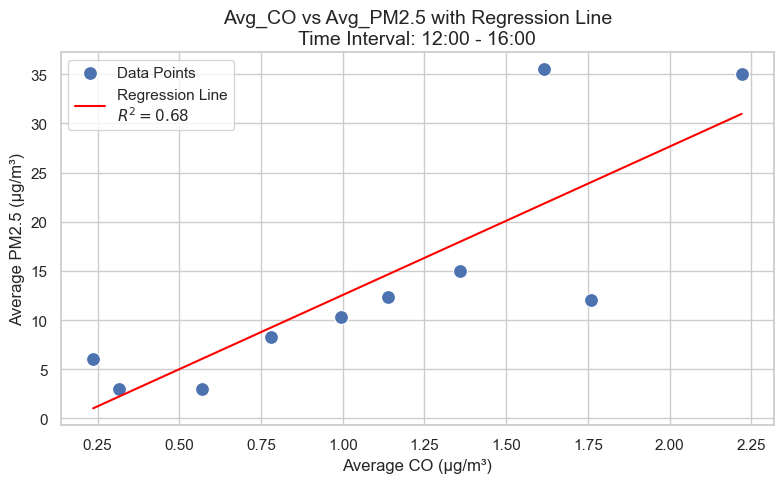

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

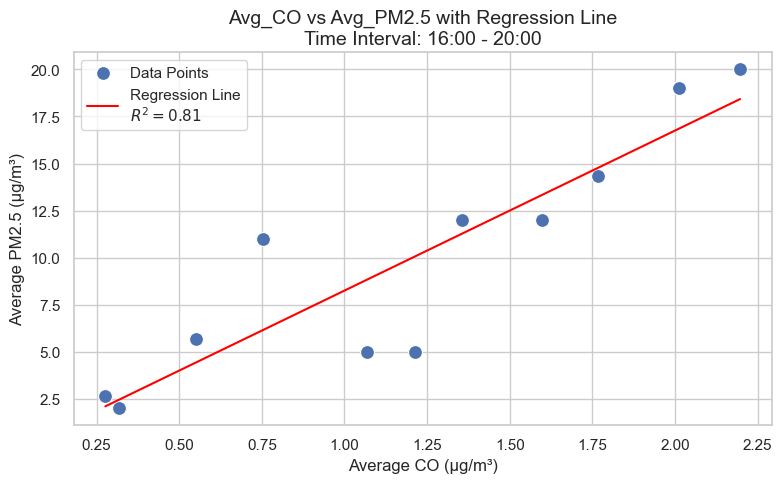

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1193422224.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

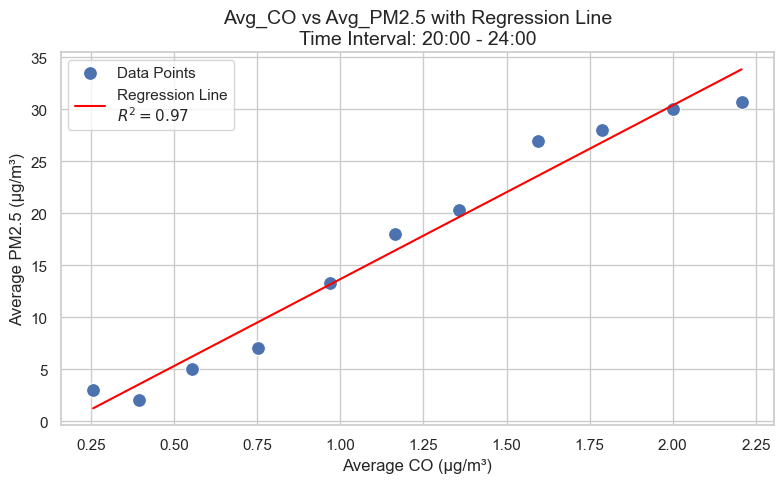

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert 'PM2.5' column to numeric, forcing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows where PM2.5 is zero
df = df[(df['PM2.5'] < 70) & (df['PM2.5'] != 0)]

# Extract the hour from the 'From Date' column and ensure it's in datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['Hour'] = df['From Date'].dt.hour

# Define time intervals as tuples of (start_hour, end_hour)
time_intervals = [
    (0, 4),   # 00:00 - 04:00
    (4, 8),   # 04:00 - 08:00
    (8, 12),  # 08:00 - 12:00
    (12, 16), # 12:00 - 16:00
    (16, 20), # 16:00 - 20:00
    (20, 24)  # 20:00 - 24:00
]

# Define bins and labels for CO
bins = [0.1,0.3,0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Loop through each time interval
for start_hour, end_hour in time_intervals:
    # Create a mask for the current time interval
    time_mask = (df['Hour'] >= start_hour) & (df['Hour'] < end_hour)
    
    # Filter the DataFrame for the current time interval
    filtered_df = df[time_mask]
    
    # Bin the CO values
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R² value
    if not avg_data_cleaned.empty:  # Check if there's data to analyze
        x = avg_data_cleaned['Avg_CO']
        y = avg_data_cleaned['Avg_PM2.5']
        slope, intercept = np.polyfit(x, y, 1)
        line = slope * x + intercept
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
        plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

        # Add title and labels
        plt.title(f'Avg_CO vs Avg_PM2.5 with Regression Line\nTime Interval: {start_hour}:00 - {end_hour}:00', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display legend and plot
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for the time interval: {start_hour}:00 - {end_hour}:00")


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

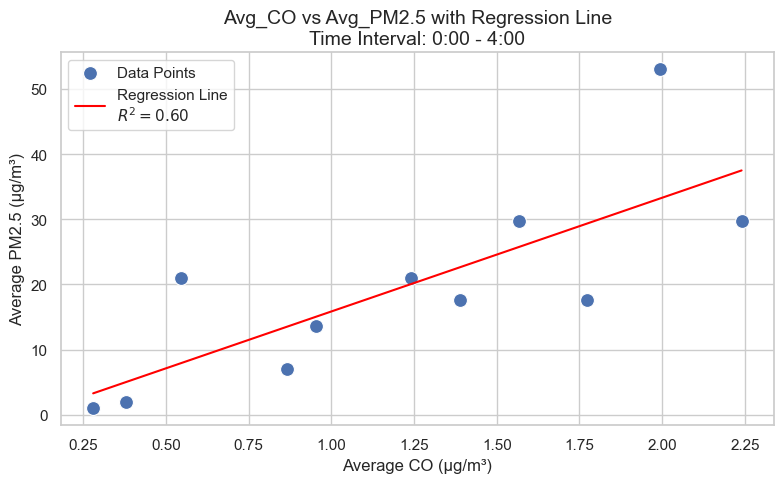

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

RP values for time interval 0:00 - 4:00:
     CO_bin         RP
0   0.1-0.3   3.571429
1   0.3-0.5   5.263158
2   0.5-0.7  38.414634
3   0.7-0.9   8.076923
4   0.9-1.1  14.335664
5   1.1-1.3  16.935484
6   1.3-1.5  12.709832
7   1.5-1.7  18.936170
8   1.7-1.9   9.962406
9   1.9-2.1  26.588629
10  2.1-2.3  13.244048
15.276216058158871


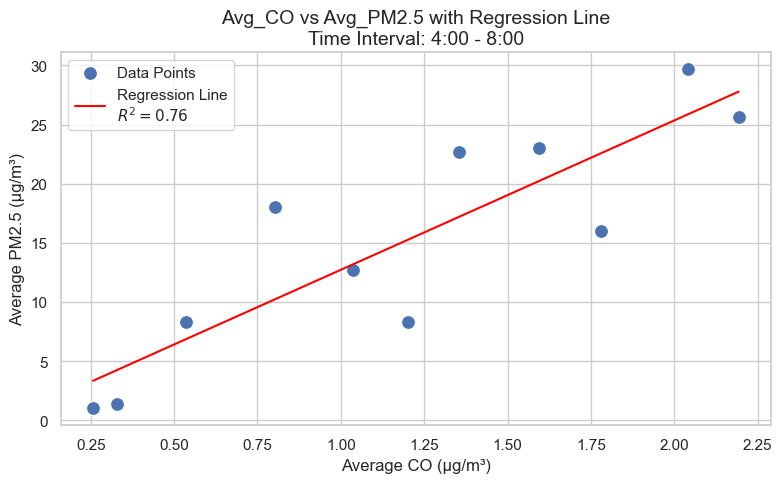

RP values for time interval 4:00 - 8:00:
     CO_bin         RP
0   0.1-0.3   3.896104
1   0.3-0.5   4.040404
2   0.5-0.7  15.527950
3   0.7-0.9  22.406639
4   0.9-1.1  12.218650
5   1.1-1.3   6.944444
6   1.3-1.5  16.748768
7   1.5-1.7  14.435146
8   1.7-1.9   8.988764
9   1.9-2.1  14.542484
10  2.1-2.3  11.702128
11.950134681310521


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

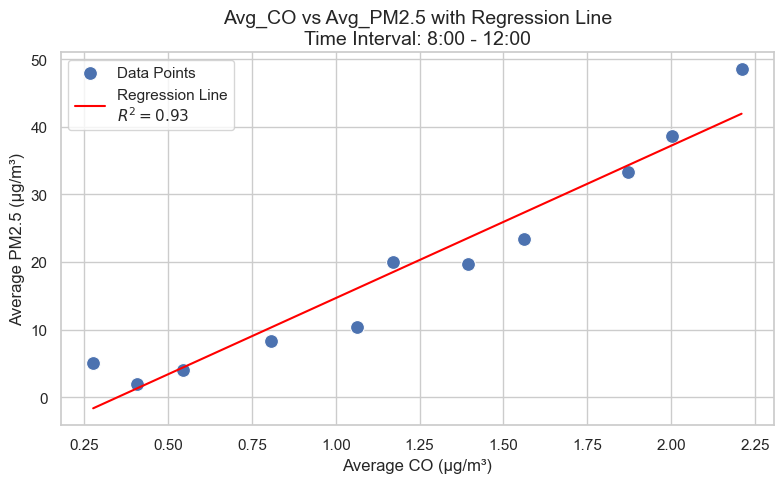

RP values for time interval 8:00 - 12:00:
     CO_bin         RP
0   0.1-0.3  18.072289
1   0.3-0.5   4.918033
2   0.5-0.7   7.361963
3   0.7-0.9  10.330579
4   0.9-1.1   9.717868
5   1.1-1.3  17.094017
6   1.3-1.5  14.114833
7   1.5-1.7  14.957265
8   1.7-1.9  17.825312
9   1.9-2.1  19.301165
10  2.1-2.3  21.945701
14.14900223615458


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

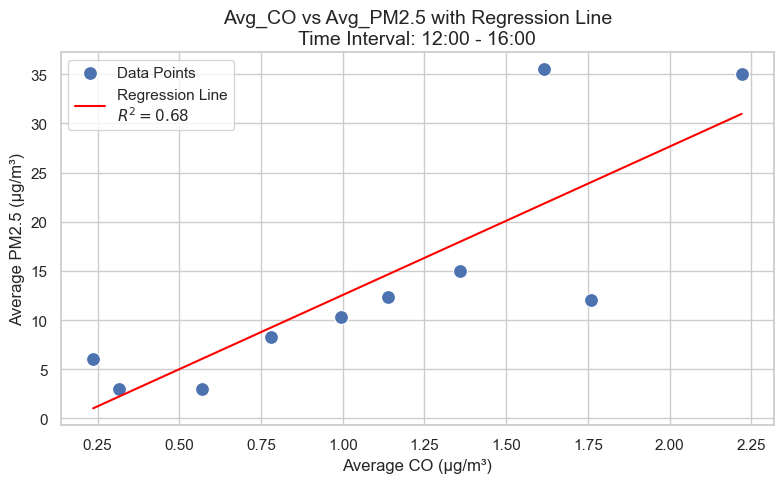

RP values for time interval 12:00 - 16:00:
     CO_bin         RP
0   0.1-0.3  25.352113
1   0.3-0.5   9.473684
2   0.5-0.7   5.263158
3   0.7-0.9  10.683761
4   0.9-1.1  10.402685
5   1.1-1.3  10.818713
6   1.3-1.5  11.029412
7   1.5-1.7  21.981424
8   1.7-1.9   6.818182
10  2.1-2.3  15.765766
12.758889697639125


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

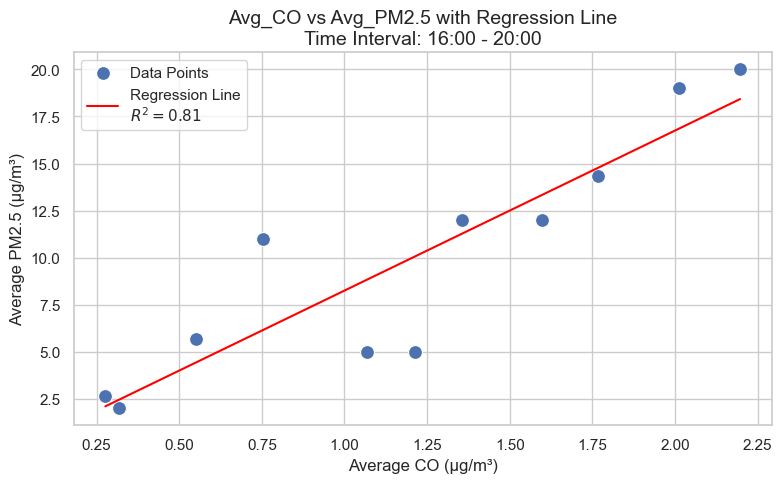

RP values for time interval 16:00 - 20:00:
     CO_bin         RP
0   0.1-0.3   9.638554
1   0.3-0.5   6.315789
2   0.5-0.7  10.303030
3   0.7-0.9  14.601770
4   0.9-1.1   4.687500
5   1.1-1.3   4.120879
6   1.3-1.5   8.845209
7   1.5-1.7   7.515658
8   1.7-1.9   8.113208
9   1.9-2.1   9.437086
10  2.1-2.3   9.104704
8.425762475292546


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3407458401.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

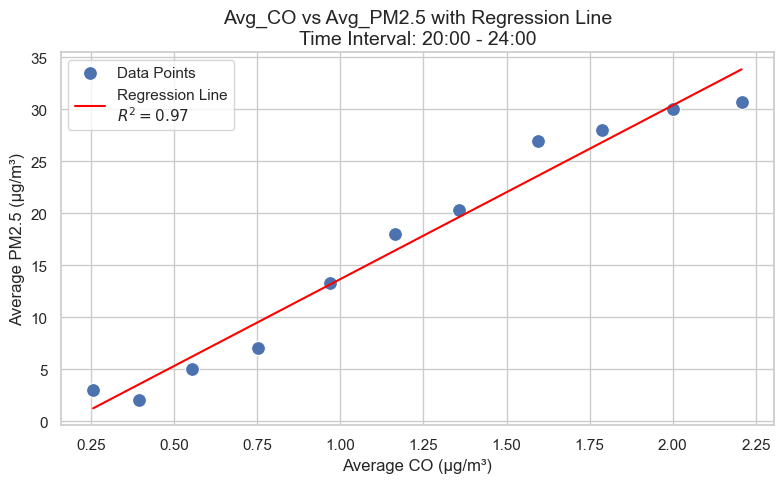

RP values for time interval 20:00 - 24:00:
     CO_bin         RP
0   0.1-0.3  11.688312
1   0.3-0.5   5.084746
2   0.5-0.7   9.036145
3   0.7-0.9   9.292035
4   0.9-1.1  13.745704
5   1.1-1.3  15.472779
6   1.3-1.5  14.987715
7   1.5-1.7  16.945607
8   1.7-1.9  15.671642
9   1.9-2.1  15.000000
10  2.1-2.3  13.897281
12.801996882239651


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert 'PM2.5' column to numeric, forcing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows where PM2.5 is zero
df = df[(df['PM2.5'] < 70) & (df['PM2.5'] != 0)]

# Extract the hour from the 'From Date' column and ensure it's in datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['Hour'] = df['From Date'].dt.hour

# Define time intervals as tuples of (start_hour, end_hour)
time_intervals = [
    (0, 4),   # 00:00 - 04:00
    (4, 8),   # 04:00 - 08:00
    (8, 12),  # 08:00 - 12:00
    (12, 16), # 12:00 - 16:00
    (16, 20), # 16:00 - 20:00
    (20, 24)  # 20:00 - 24:00
]

# Define bins and labels for CO
bins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Loop through each time interval
for start_hour, end_hour in time_intervals:
    # Create a mask for the current time interval
    time_mask = (df['Hour'] >= start_hour) & (df['Hour'] < end_hour)
    
    # Filter the DataFrame for the current time interval
    filtered_df = df[time_mask]
    
    # Bin the CO values
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations and corresponding CO
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()
    
    # Rename columns for clarity before calculating RP
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Calculate RP (mean PM2.5/CO ratio)
    avg_data['RP'] = avg_data['Avg_PM2.5'] / avg_data['Avg_CO']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R² value
    if not avg_data_cleaned.empty:  # Check if there's data to analyze
        x = avg_data_cleaned['Avg_CO']
        y = avg_data_cleaned['Avg_PM2.5']
        slope, intercept = np.polyfit(x, y, 1)
        line = slope * x + intercept
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
        plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

        # Add title and labels
        plt.title(f'Avg_CO vs Avg_PM2.5 with Regression Line\nTime Interval: {start_hour}:00 - {end_hour}:00', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display legend and plot
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Print RP values for the current time interval
        print(f'RP values for time interval {start_hour}:00 - {end_hour}:00:')
        print(avg_data_cleaned[['CO_bin', 'RP']])
        print(avg_data_cleaned['RP'].mean())
    else:
        print(f"No data available for the time interval: {start_hour}:00 - {end_hour}:00")


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3720655312.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3720655312.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3720655312.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

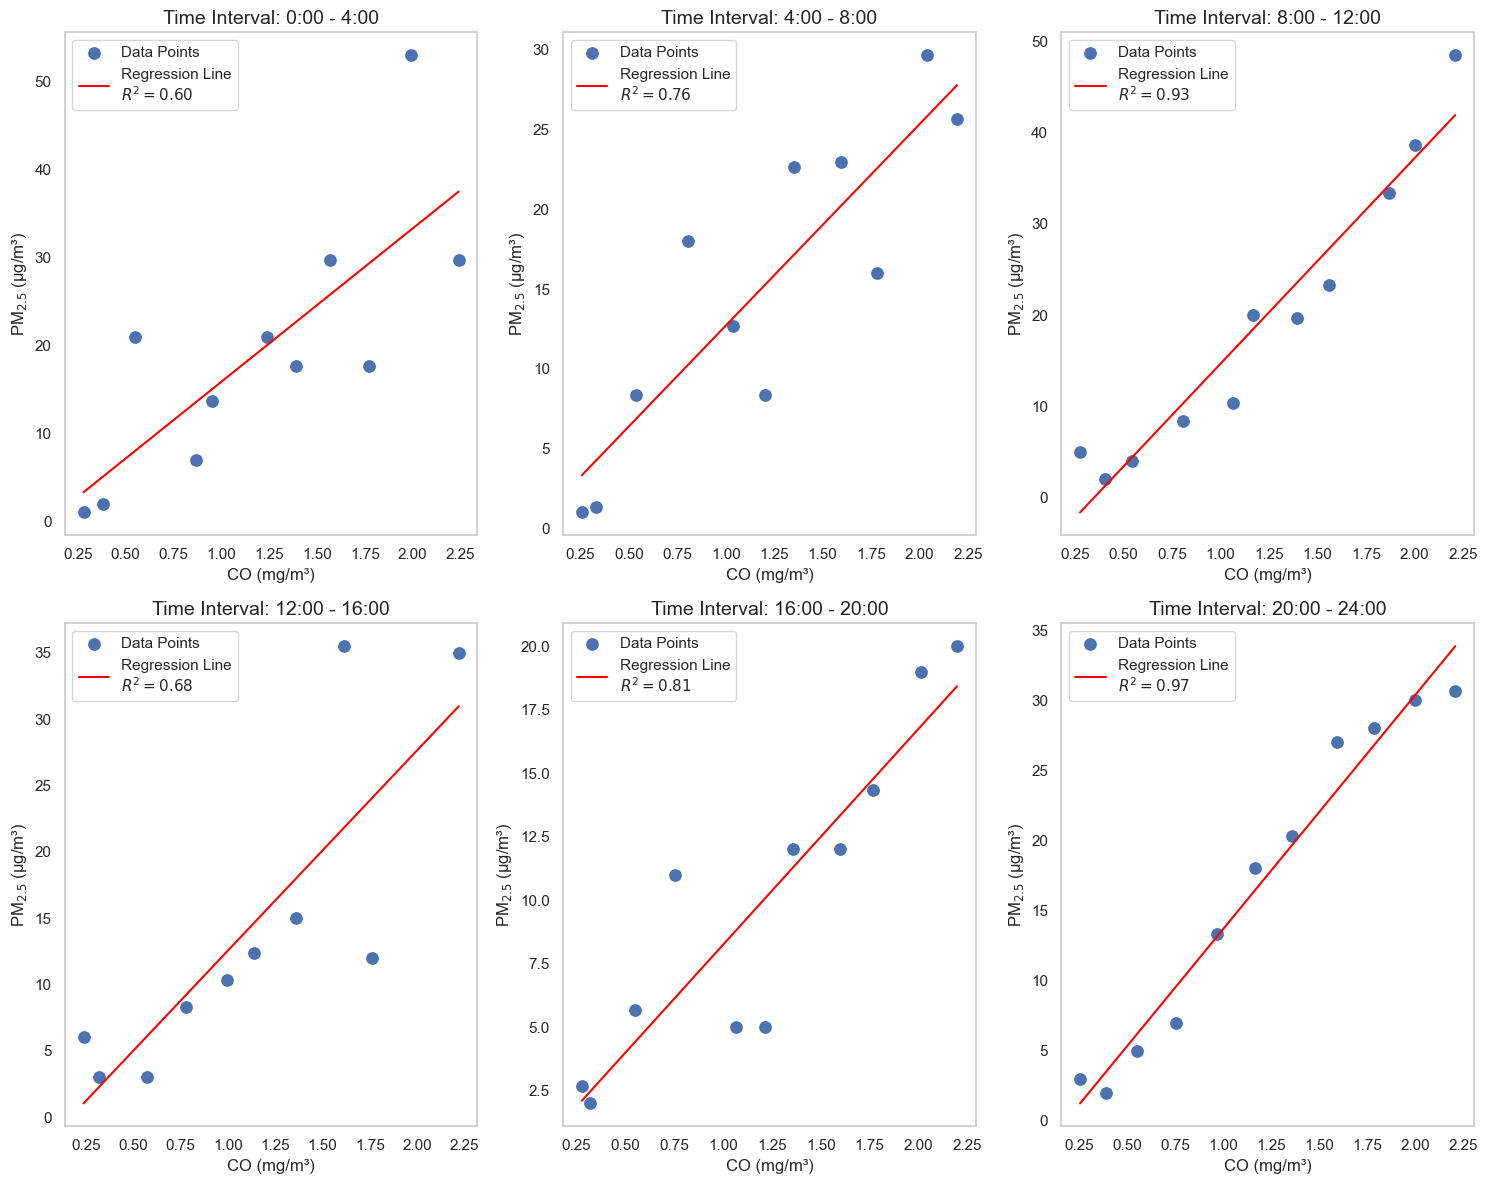

RP values for time interval 0:00 - 4:00:
     CO_bin         RP
0   0.1-0.3  11.688312
1   0.3-0.5   5.084746
2   0.5-0.7   9.036145
3   0.7-0.9   9.292035
4   0.9-1.1  13.745704
5   1.1-1.3  15.472779
6   1.3-1.5  14.987715
7   1.5-1.7  16.945607
8   1.7-1.9  15.671642
9   1.9-2.1  15.000000
10  2.1-2.3  13.897281
Mean RP: 12.801996882239651
RP values for time interval 4:00 - 8:00:
     CO_bin         RP
0   0.1-0.3  11.688312
1   0.3-0.5   5.084746
2   0.5-0.7   9.036145
3   0.7-0.9   9.292035
4   0.9-1.1  13.745704
5   1.1-1.3  15.472779
6   1.3-1.5  14.987715
7   1.5-1.7  16.945607
8   1.7-1.9  15.671642
9   1.9-2.1  15.000000
10  2.1-2.3  13.897281
Mean RP: 12.801996882239651
RP values for time interval 8:00 - 12:00:
     CO_bin         RP
0   0.1-0.3  11.688312
1   0.3-0.5   5.084746
2   0.5-0.7   9.036145
3   0.7-0.9   9.292035
4   0.9-1.1  13.745704
5   1.1-1.3  15.472779
6   1.3-1.5  14.987715
7   1.5-1.7  16.945607
8   1.7-1.9  15.671642
9   1.9-2.1  15.000000
10  2.1-2.3  13

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert 'PM2.5' column to numeric, forcing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove rows where PM2.5 is zero
df = df[(df['PM2.5'] < 70) & (df['PM2.5'] != 0)]

# Extract the hour from the 'From Date' column and ensure it's in datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)
df['Hour'] = df['From Date'].dt.hour

# Define time intervals as tuples of (start_hour, end_hour)
time_intervals = [
    (0, 4),   # 00:00 - 04:00
    (4, 8),   # 04:00 - 08:00
    (8, 12),  # 08:00 - 12:00
    (12, 16), # 12:00 - 16:00
    (16, 20), # 16:00 - 20:00
    (20, 24)  # 20:00 - 24:00
]

# Define bins and labels for CO
bins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each time interval
for idx, (start_hour, end_hour) in enumerate(time_intervals):
    # Create a mask for the current time interval
    time_mask = (df['Hour'] >= start_hour) & (df['Hour'] < end_hour)
    
    # Filter the DataFrame for the current time interval
    filtered_df = df[time_mask]
    
    # Bin the CO values
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations and corresponding CO
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()
    
    # Rename columns for clarity before calculating RP
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Calculate RP (mean PM2.5/CO ratio)
    avg_data['RP'] = avg_data['Avg_PM2.5'] / avg_data['Avg_CO']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R² value
    if not avg_data_cleaned.empty:  # Check if there's data to analyze
        x = avg_data_cleaned['Avg_CO']
        y = avg_data_cleaned['Avg_PM2.5']
        slope, intercept = np.polyfit(x, y, 1)
        line = slope * x + intercept
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line in the corresponding subplot
        ax = axes[idx]
        sns.scatterplot(x=x, y=y, s=100, color='b', ax=ax, label='Data Points')
        ax.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

        # Add title and labels
        ax.set_title(f'Time Interval: {start_hour}:00 - {end_hour}:00', fontsize=14)
        ax.set_xlabel('CO (mg/m³)', fontsize=12)
        ax.set_ylabel('PM$_{2.5}$ (µg/m³)', fontsize=12)
        ax.grid(False)

        ax.legend()
    else:
        # If no data is available, set a title
        axes[idx].set_title(f'No data\nTime Interval: {start_hour}:00 - {end_hour}:00', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print RP values for each time interval
for idx, (start_hour, end_hour) in enumerate(time_intervals):
    print(f'RP values for time interval {start_hour}:00 - {end_hour}:00:')
    if not avg_data_cleaned.empty:
        print(avg_data_cleaned[['CO_bin', 'RP']])
        print("Mean RP:", avg_data_cleaned['RP'].mean())
    else:
        print("No data available.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will 

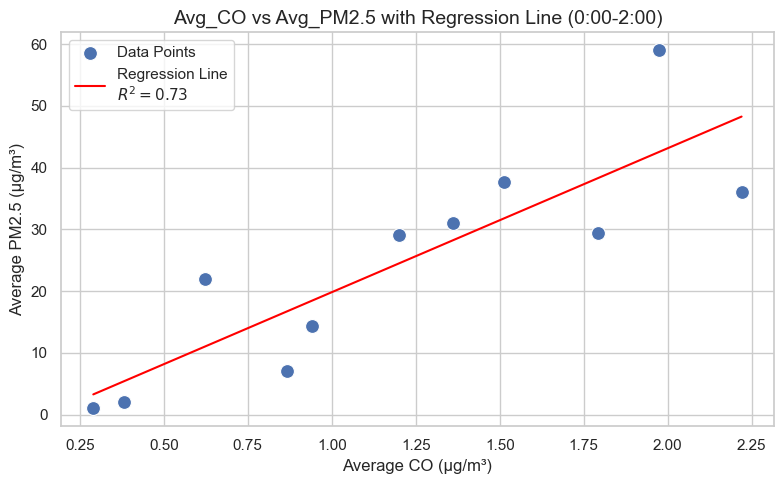

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3923195820.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

In [140]:

# Extract the hour from the 'From Date' column
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Define new bins for CO (with the specified bin edges)
bins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Define the time intervals (as pairs of start and end hours)
time_intervals = [(0, 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Iterate over each time interval
for start_hour, end_hour in time_intervals:
    # Create a mask to filter for the specific time interval
    time_mask = (filtered_df['Hour'] >= start_hour) & (filtered_df['Hour'] < end_hour)
    
    # Filter the DataFrame for the current time interval
    interval_df = filtered_df[time_mask]
    
    # Bin the CO data and create CO bins
    interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
    
    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = interval_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    if not avg_data_cleaned.empty:
        # Calculate the regression line (linear fit) and R^2 value
        x = avg_data_cleaned['Avg_CO']
        y = avg_data_cleaned['Avg_PM2.5']
        slope, intercept = np.polyfit(x, y, 1)
        line = slope * x + intercept
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line for the time interval
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
        plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

        # Add title and labels specific to the time interval
        plt.title(f'Avg_CO vs Avg_PM2.5 with Regression Line ({start_hour}:00-{end_hour}:00)', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display legend and plot
        plt.legend()
        plt.tight_layout()
        plt.show()


In [118]:
import pandas as pd

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the date range for filtering (April 17 to May 2, 2024)
start_date = pd.to_datetime('2024-04-17')
end_date = pd.to_datetime('2024-05-02')

# Filter the dataframe for rows within this date range
filtered_df = df[(df['From Date'] >= start_date) & (df['From Date'] <= end_date)]

# Extract the hour from the 'From Date' column
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Create a mask to filter for the 00:00 - 02:00 time interval
time_mask = (filtered_df['Hour'] >= 0) & (filtered_df['Hour'] < 2)

# Filter the DataFrame for the 00:00 - 02:00 time interval
filtered_time_df = filtered_df[time_mask]

# Display the resulting DataFrame
print(filtered_time_df)


                From Date           To Date  PM2.5   PM10   NO   NO2   NOx  \
10272 2024-04-17 00:00:00  17-04-2024 00:15   30.0  204.0  0.8  30.8  17.0   
10273 2024-04-17 00:15:00  17-04-2024 00:30   30.0  204.0  1.1  30.0  16.8   
10274 2024-04-17 00:30:00  17-04-2024 00:45   30.0  204.0  1.1  30.6  17.2   
10275 2024-04-17 00:45:00  17-04-2024 01:00   28.0  132.0  1.4  33.4  18.9   
10276 2024-04-17 01:00:00  17-04-2024 01:15   28.0  132.0  1.6  34.5  19.6   
...                   ...               ...    ...    ...  ...   ...   ...   
11620 2024-05-01 01:00:00  01-05-2024 01:15   62.0  250.0  1.4  43.8  24.4   
11621 2024-05-01 01:15:00  01-05-2024 01:30   62.0  250.0  1.2  42.9  23.8   
11622 2024-05-01 01:30:00  01-05-2024 01:45   62.0  250.0  1.4  39.6  22.2   
11623 2024-05-01 01:45:00  01-05-2024 02:00  107.0  285.0  1.2  36.2  20.2   
11712 2024-05-02 00:00:00  02-05-2024 00:15   59.0  268.0  0.7  35.5  19.4   

        NH3  SO2    CO  ...  Temp    RH   WS   WD   SR     BP  

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\401393289.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\377427821.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\377427821.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\377427821.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future vers

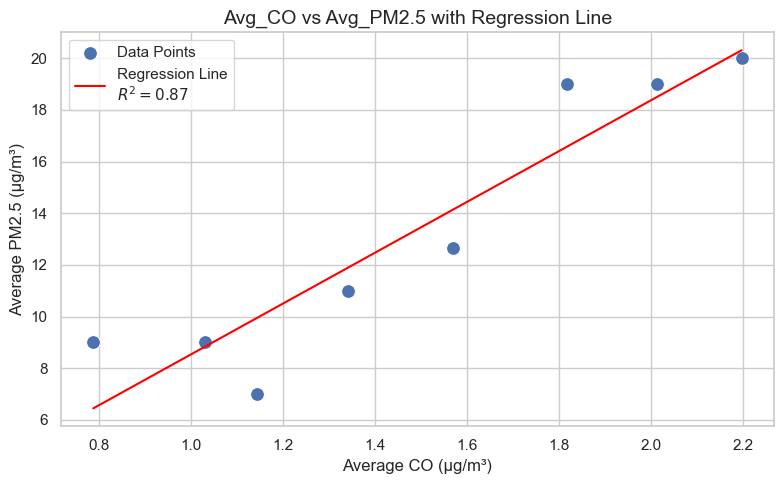

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # Define the path to the Excel file
# data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# # Read the Excel file and convert 'From Date' to datetime format
# df = pd.read_excel(data_path, sheet_name=1)
# df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# # Define specific dates to filter and convert to date-only format
# specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
#                                  '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# # Filter the DataFrame for the specific dates and the 00:00 to 02:00 time interval
# mask = df['From Date'].dt.date.isin(specific_dates) & \
#        (df['From Date'].dt.hour >= 0) & (df['From Date'].dt.hour < 2)
# filtered_df = df[mask]

# Define CO concentration bins and create a new column for CO bins
bins = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7,1.9,2.1,2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]
filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

# Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
avg_data = filtered_df.groupby('CO_bin').apply(
    lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

# Rename columns for clarity
avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

# Filter out NaN values
avg_data_cleaned = avg_data.dropna()

# Calculate the regression line (linear fit) and R^2 value
x = avg_data_cleaned['Avg_CO']
y = avg_data_cleaned['Avg_PM2.5']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept
r_squared = np.corrcoef(x, y)[0, 1] ** 2

# Create scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

# Add title and labels
plt.title('Avg_CO vs Avg_PM2.5 with Regression Line', fontsize=14)
plt.xlabel('Average CO (µg/m³)', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

# Display legend and plot
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and w

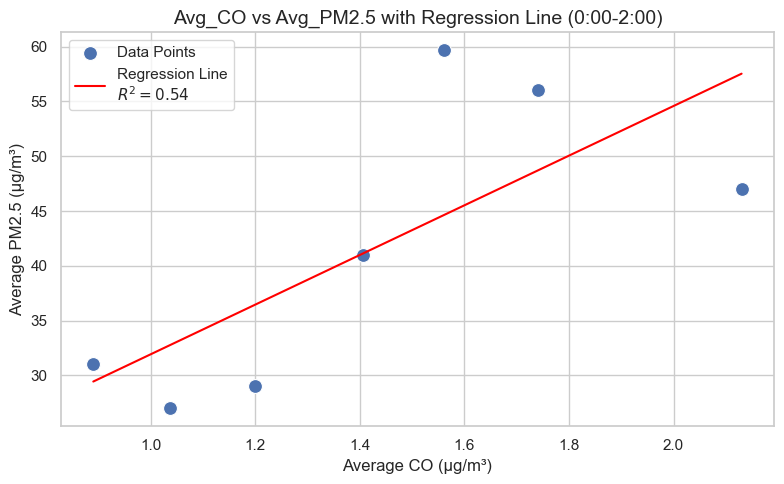

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

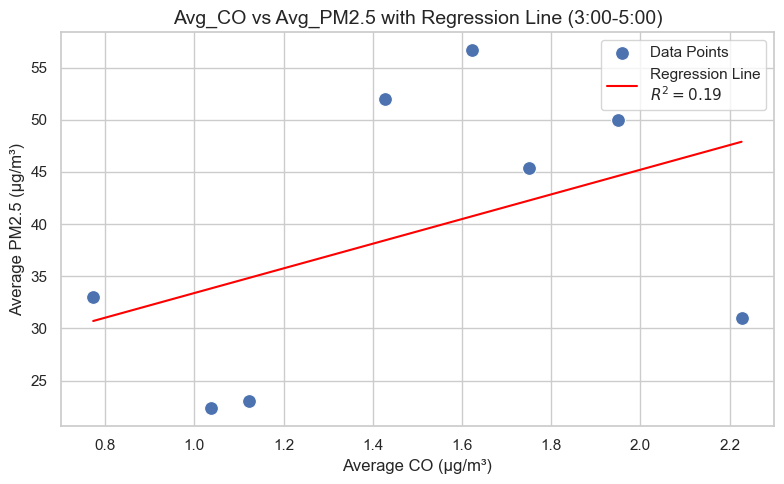

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

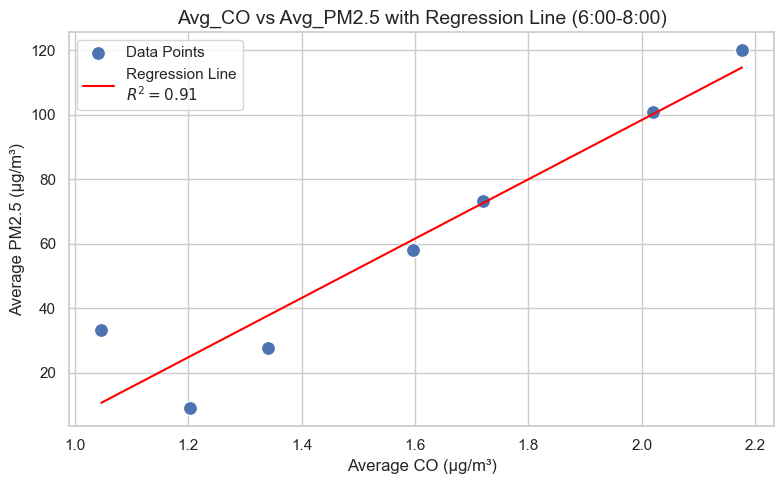

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

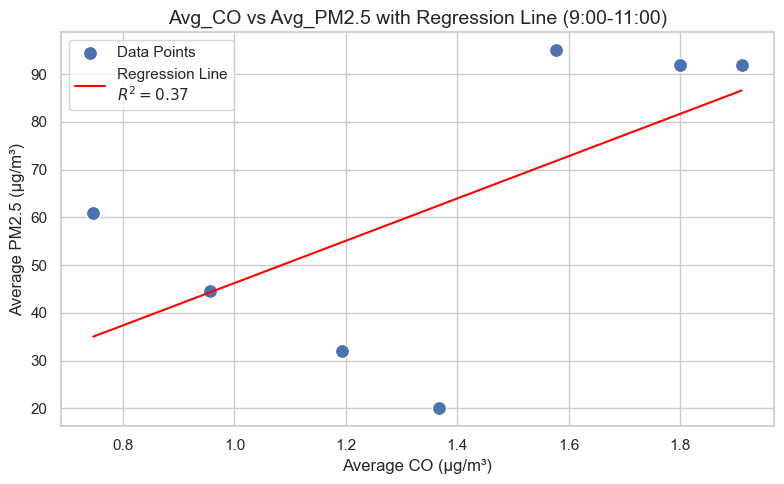

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

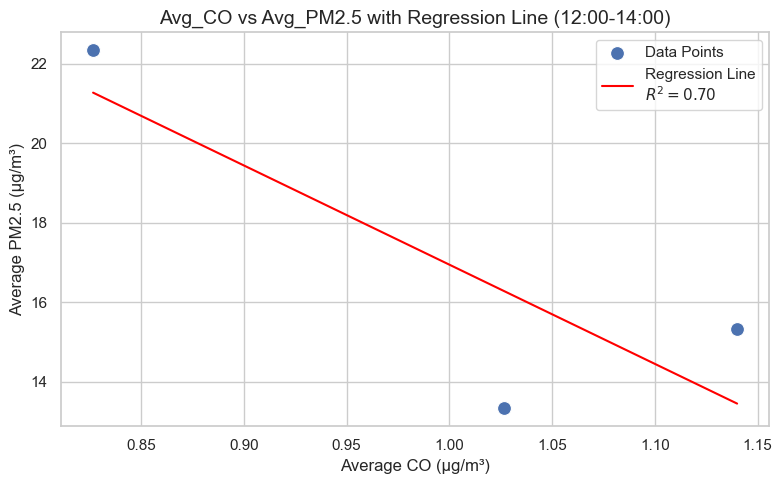

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

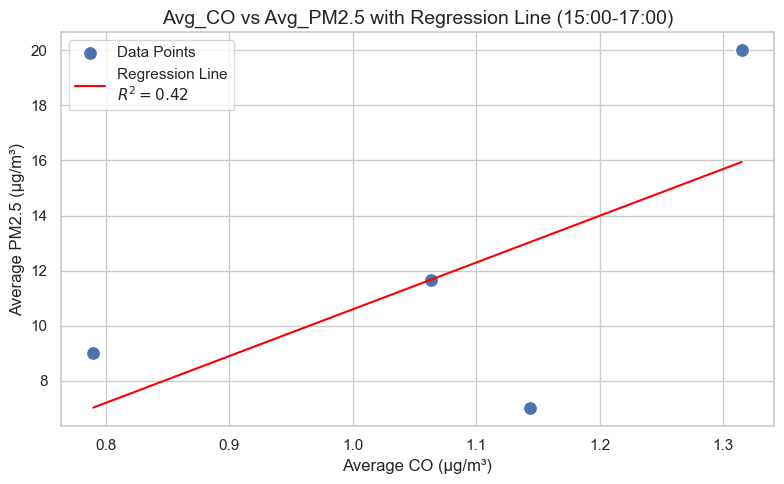

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

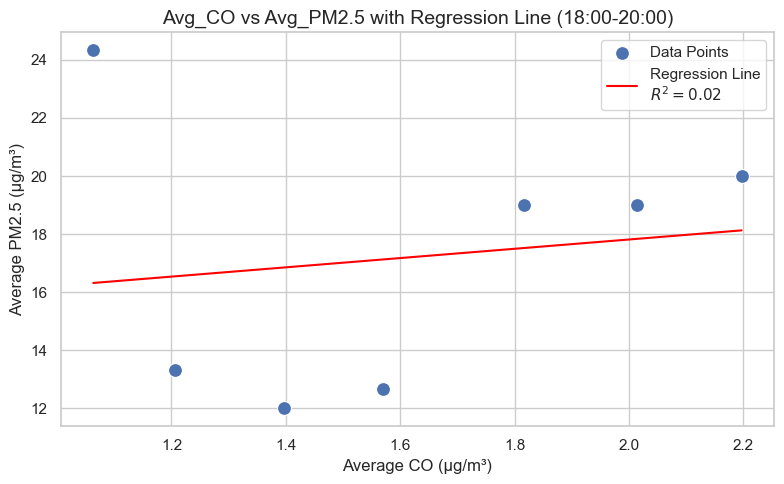

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = interval_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3327178394.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

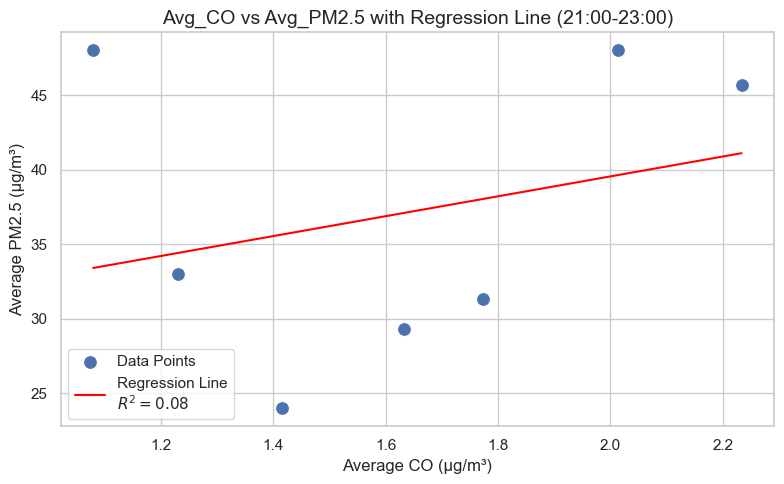

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the date range for filtering (April 17 to May 2, 2024)
start_date = pd.to_datetime('2024-04-17')
end_date = pd.to_datetime('2024-05-02')

# Filter the dataframe for rows within this date range
filtered_df = df[(df['From Date'] >= start_date) & (df['From Date'] <= end_date)]

# Extract the hour from the 'From Date' column
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Define new bins for CO (with the specified bin edges)
bins = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Define the time intervals (as pairs of start and end hours)
time_intervals = [(0, 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Iterate over each time interval
for start_hour, end_hour in time_intervals:
    # Create a mask to filter for the specific time interval
    time_mask = (filtered_df['Hour'] >= start_hour) & (filtered_df['Hour'] < end_hour)
    
    # Filter the DataFrame for the current time interval
    interval_df = filtered_df[time_mask]
    
    # Bin the CO data and create CO bins
    interval_df['CO_bin'] = pd.cut(interval_df['CO'], bins=bins, labels=labels, include_lowest=True)
    
    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = interval_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    if not avg_data_cleaned.empty:
        # Calculate the regression line (linear fit) and R^2 value
        x = avg_data_cleaned['Avg_CO']
        y = avg_data_cleaned['Avg_PM2.5']
        slope, intercept = np.polyfit(x, y, 1)
        line = slope * x + intercept
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line for the time interval
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
        plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

        # Add title and labels specific to the time interval
        plt.title(f'Avg_CO vs Avg_PM2.5 with Regression Line ({start_hour}:00-{end_hour}:00)', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display legend and plot
        plt.legend()
        plt.tight_layout()
        plt.show()


In [121]:
bins_linspace = np.linspace(0.5, 2.3, num=10)

print(bins_linspace)


[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3]


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(


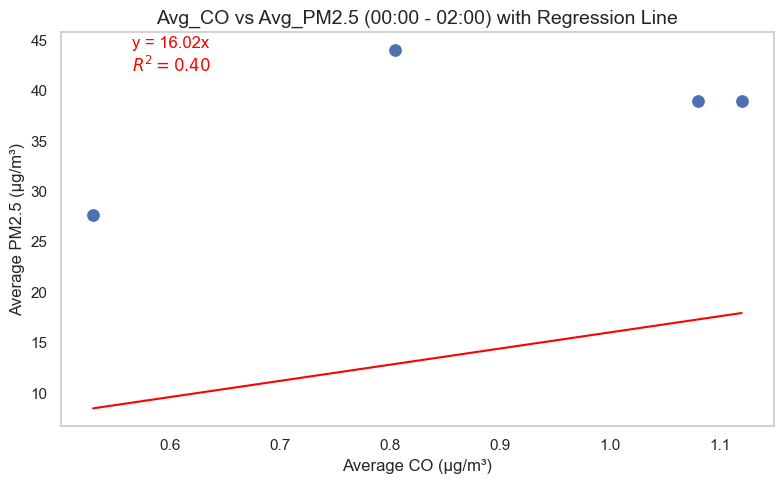

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:50: RankWarning: Polyfit may be poorly conditioned
  slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
C:\Users\Admin\AppDat

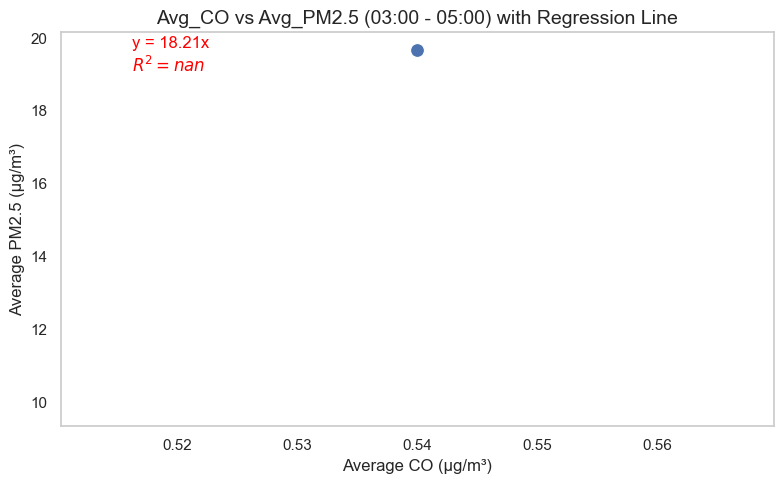

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(


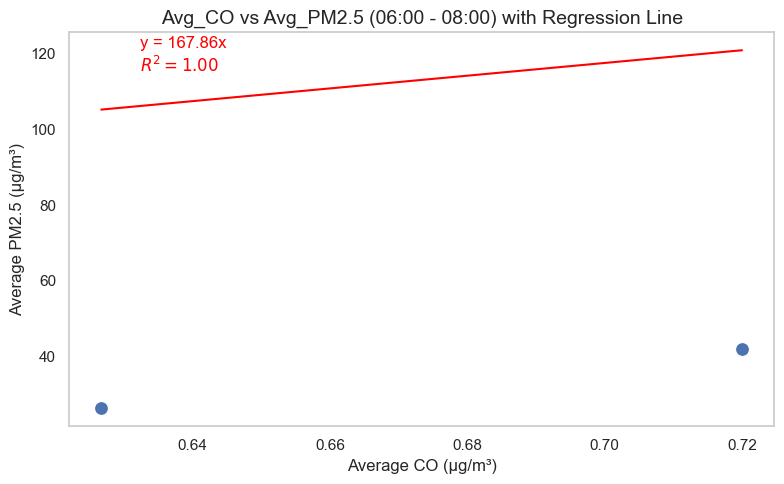

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(


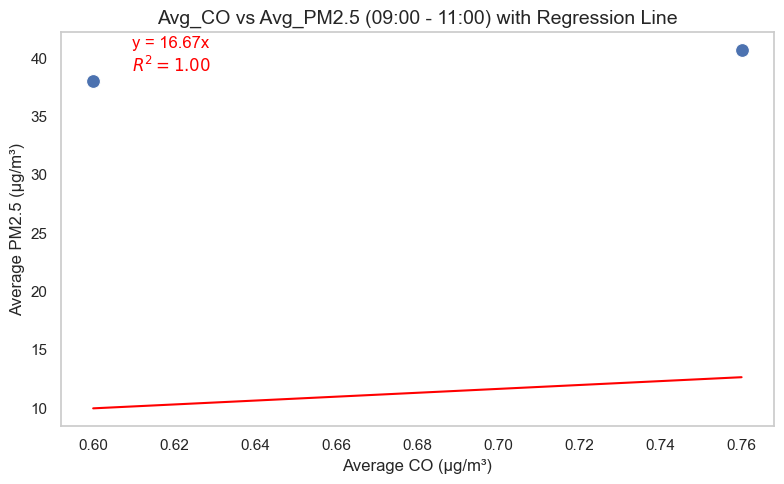

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:50: RankWarning: Polyfit may be poorly conditioned
  slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
C:\Users\Admin\AppDat

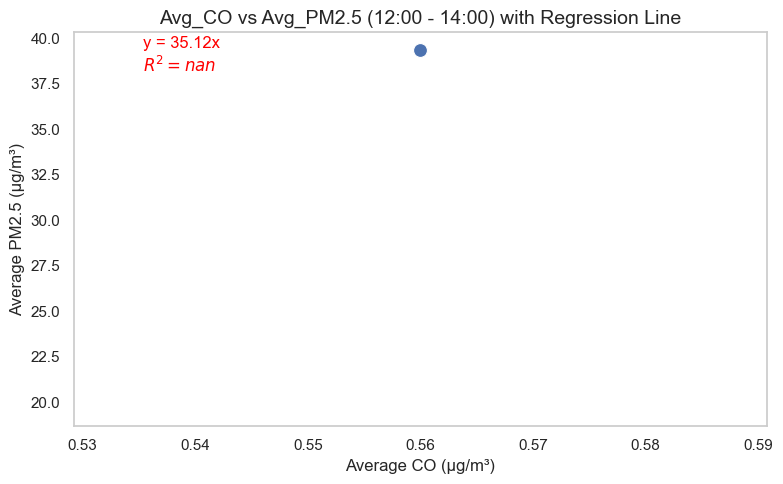

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:50: RankWarning: Polyfit may be poorly conditioned
  slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
C:\Users\Admin\AppDat

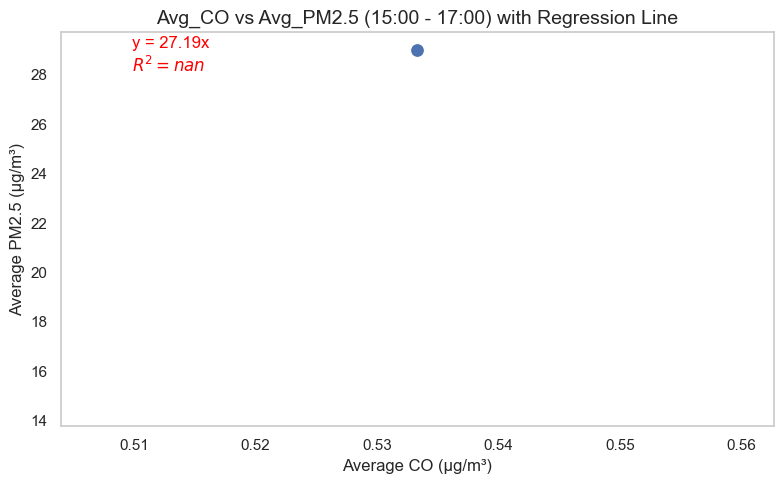

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(


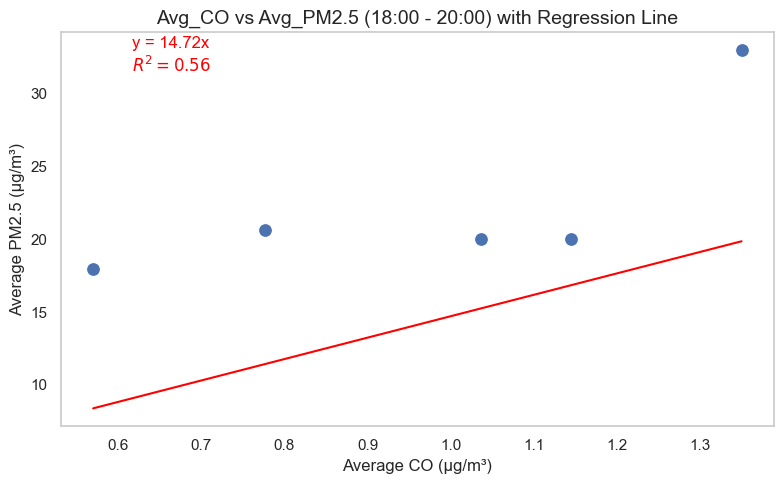

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3844570089.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(


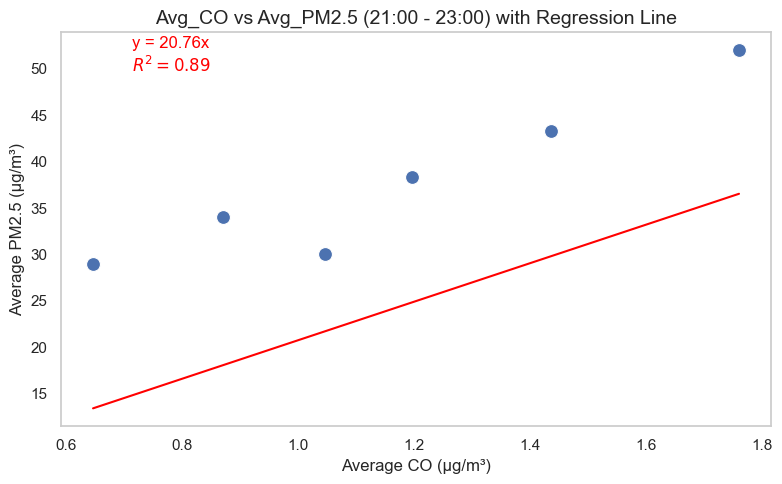

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
# data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# # Read the Excel file and convert 'From Date' to datetime format
# df = pd.read_excel(data_path, sheet_name=1)
# df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# # Define specific dates to filter and convert to date-only format
# specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
#                                  '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# Define the hour intervals
hour_intervals = [(0, 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Loop through each hour interval
for start_hour, end_hour in hour_intervals:
    # Create mask for filtering specific dates and hour interval
    mask = df['From Date'].dt.date.isin(specific_dates) & \
           (df['From Date'].dt.hour >= start_hour) & (df['From Date'].dt.hour < end_hour)
    filtered_df = df[mask]

    # Drop rows with NaN values in 'CO' and 'PM2.5'
    filtered_df = filtered_df.dropna(subset=['CO', 'PM2.5'])

    # Define CO concentration bins from 0 to 1.7 with 10 equal intervals
    bins = np.linspace(0.5, 2.3, num=10)  # 11 values create 10 bins
    labels = [f'{bins[i]:.1f}-{bins[i + 1]:.1f}' for i in range(len(bins) - 1)]
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R^2 value
    x = avg_data_cleaned['Avg_CO']
    y = avg_data_cleaned['Avg_PM2.5']
    
    if not x.empty and not y.empty:  # Check if data is available for regression
        slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
        line = slope * x
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b')  # Removed label for legend
        plt.plot(x, line, color='red')  # Removed label for legend

        # Add title and labels
        plt.title(f'Avg_CO vs Avg_PM2.5 ({start_hour:02d}:00 - {end_hour:02d}:00) with Regression Line', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display the regression slope and R^2 on the plot
        equation_text = f'y = {slope:.2f}x\n$R^2 = {r_squared:.2f}$'
        plt.text(0.1, 0.9, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red')

        # Remove grid and display plot
        plt.grid(False)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data for interval {start_hour:02d}:00 - {end_hour:02d}:00")


Average CO and PM2.5 data for the period 00:00 - 02:00:
    CO_bin    Avg_CO  Avg_PM2.5          RP
0  0.0-0.2  0.190000       31.0  163.157895
1  0.2-0.4  0.270000       25.0   92.592593
2  0.4-0.6  0.493333       24.0   48.648649
3  0.6-0.8  0.640000       34.0   53.125000
4  0.8-1.0  0.880000       38.0   43.181818
5  1.0-1.1  1.106667       39.0   35.240964
Mean RP for this period: 72.65781966922053


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

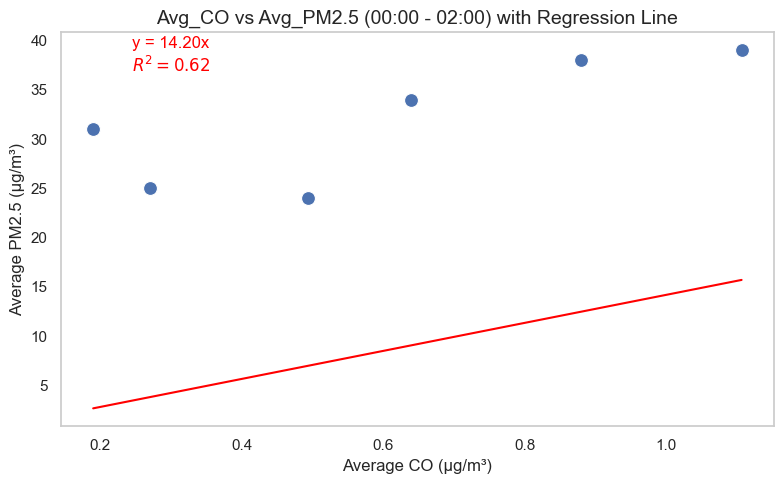

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 03:00 - 05:00:
    CO_bin  Avg_CO  Avg_PM2.5          RP
0  0.0-0.2   0.180  19.000000  105.555556
1  0.2-0.4   0.330   9.000000   27.272727
2  0.4-0.6   0.540  19.666667   36.419753
3  0.6-0.8   0.605  52.000000   85.950413
Mean RP for this period: 63.799612284460764


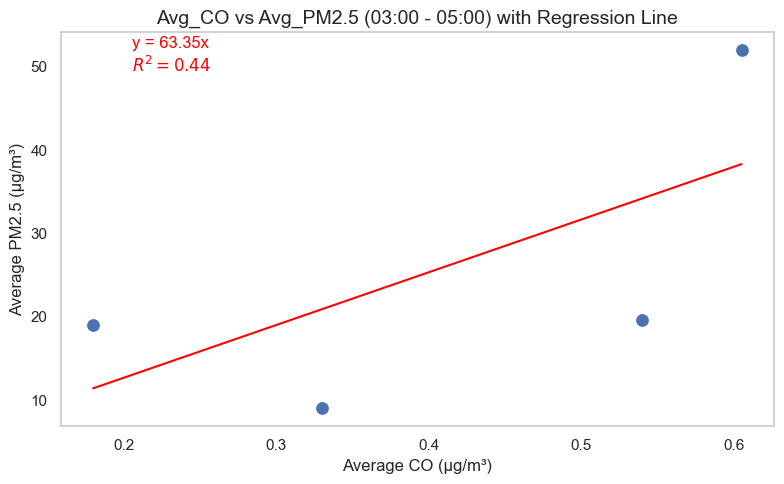

Average CO and PM2.5 data for the period 06:00 - 08:00:
    CO_bin    Avg_CO  Avg_PM2.5         RP
1  0.2-0.4  0.340000  13.000000  38.235294
2  0.4-0.6  0.453333  28.000000  61.764706
3  0.6-0.8  0.626667  26.333333  42.021277
4  0.8-1.0  0.780000  44.500000  57.051282
Mean RP for this period: 49.76813966175668


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

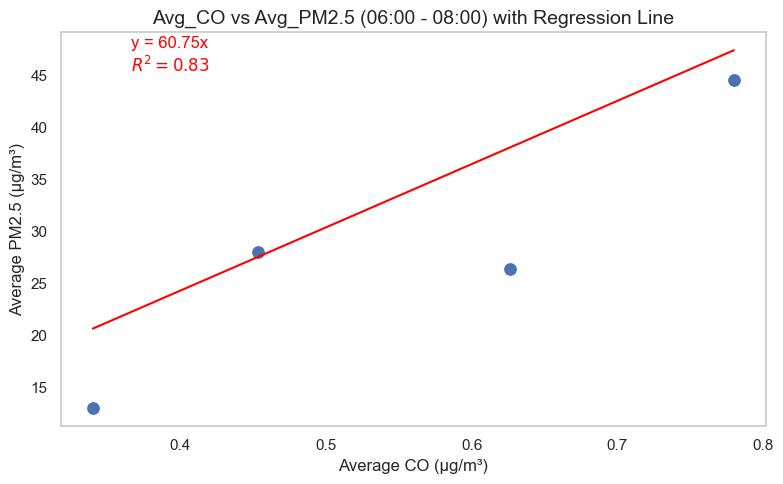

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 09:00 - 11:00:
    CO_bin  Avg_CO  Avg_PM2.5         RP
1  0.2-0.4    0.33  17.000000  51.515152
2  0.4-0.6    0.43  14.666667  34.108527
3  0.6-0.8    0.70  36.000000  51.428571
4  0.8-1.0    0.86  50.000000  58.139535
Mean RP for this period: 48.7979462398067


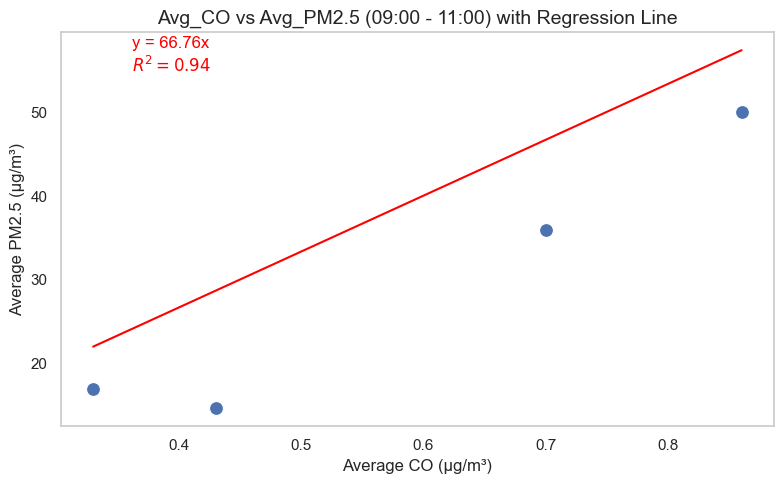

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 12:00 - 14:00:
    CO_bin    Avg_CO  Avg_PM2.5         RP
0  0.0-0.2  0.166667  14.000000  84.000000
1  0.2-0.4  0.266667  11.000000  41.250000
2  0.4-0.6  0.463333  28.666667  61.870504
3  0.6-0.8  0.630000  40.000000  63.492063
Mean RP for this period: 62.65314177229645


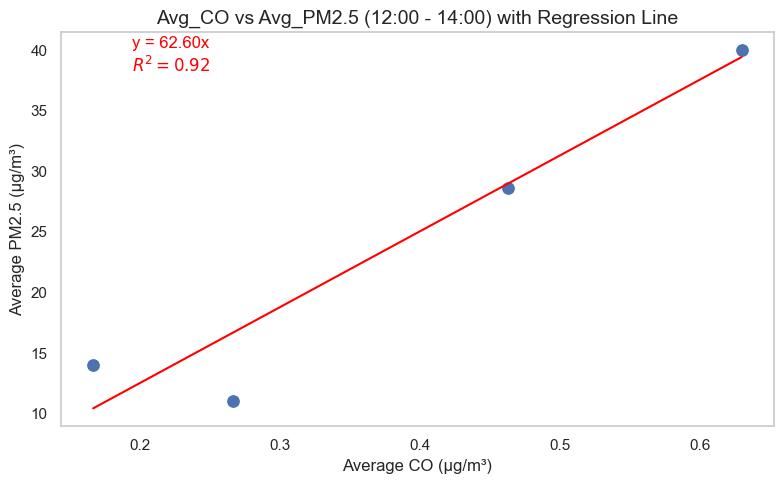

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 15:00 - 17:00:
    CO_bin    Avg_CO  Avg_PM2.5         RP
0  0.0-0.2  0.170000  16.000000  94.117647
1  0.2-0.4  0.276667  12.000000  43.373494
2  0.4-0.6  0.460000  25.333333  55.072464
3  0.6-0.8  0.640000  36.000000  56.250000
Mean RP for this period: 62.20340120071077


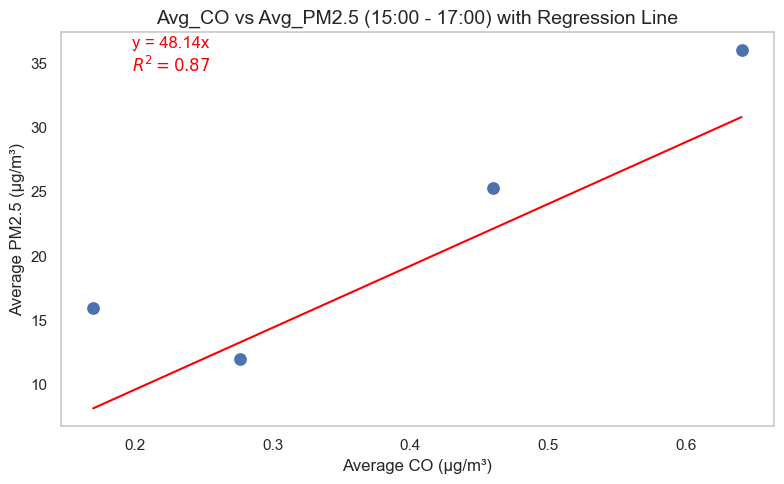

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 18:00 - 20:00:
    CO_bin    Avg_CO  Avg_PM2.5         RP
1  0.2-0.4  0.363333  16.000000  44.036697
2  0.4-0.6  0.416667  17.000000  40.800000
3  0.6-0.8  0.646667  20.000000  30.927835
4  0.8-1.0  0.810000  21.666667  26.748971
5  1.0-1.1  1.036667  20.000000  19.292605
6  1.1-1.3  1.170000  20.000000  17.094017
7  1.3-1.5  1.350000  33.000000  24.444444
Mean RP for this period: 29.04922421896253


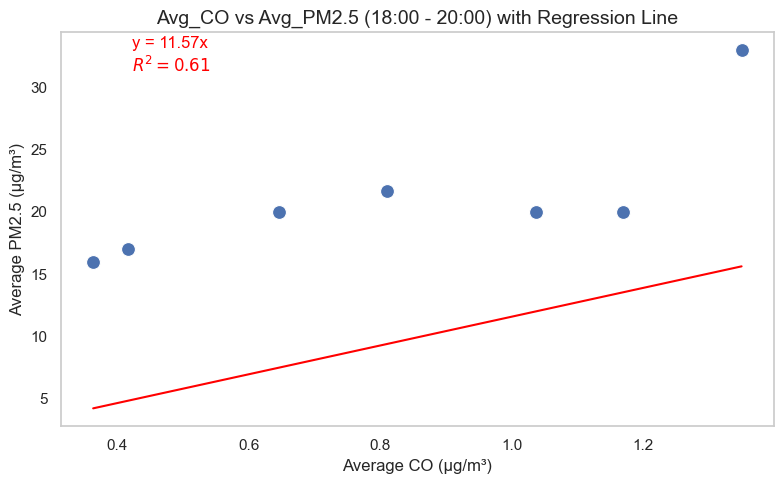

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4105563186.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Average CO and PM2.5 data for the period 21:00 - 23:00:
    CO_bin    Avg_CO  Avg_PM2.5         RP
1  0.2-0.4  0.356667  34.666667  97.196262
2  0.4-0.6  0.403333  14.000000  34.710744
3  0.6-0.8  0.646667  29.000000  44.845361
4  0.8-1.0  0.890000  33.000000  37.078652
5  1.0-1.1  1.046667  30.000000  28.662420
6  1.1-1.3  1.196667  38.333333  32.033426
7  1.3-1.5  1.436667  43.333333  30.162413
9  1.7-1.9  1.760000  52.000000  29.545455
Mean RP for this period: 41.779341512316876


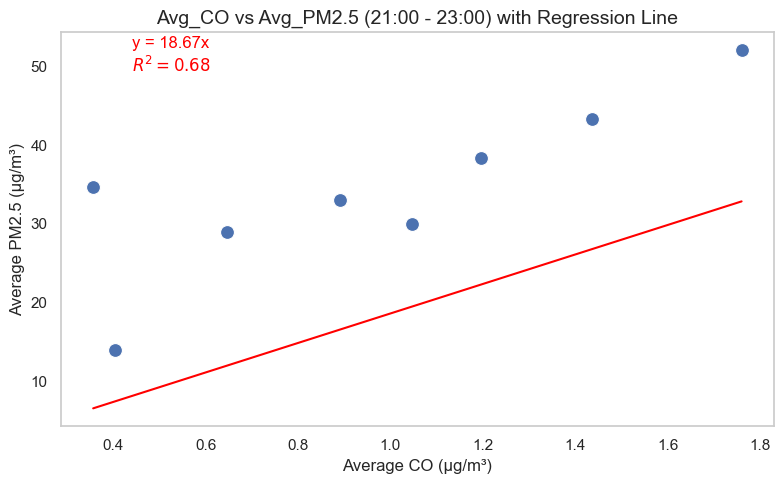


Mean RP for each hour interval:
From 00:00 to 02:00: Mean RP = 72.6578
From 03:00 to 05:00: Mean RP = 63.7996
From 06:00 to 08:00: Mean RP = 49.7681
From 09:00 to 11:00: Mean RP = 48.7979
From 12:00 to 14:00: Mean RP = 62.6531
From 15:00 to 17:00: Mean RP = 62.2034
From 18:00 to 20:00: Mean RP = 29.0492
From 21:00 to 23:00: Mean RP = 41.7793


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file and convert 'From Date' to datetime format
df = pd.read_excel(data_path, sheet_name=1)
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define specific dates to filter and convert to date-only format
specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
                                 '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# Define the hour intervals
hour_intervals = [(0, 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Initialize a list to collect mean RP values for each hour interval
mean_rp_values = []

# Loop through each hour interval
for start_hour, end_hour in hour_intervals:
    # Create mask for filtering specific dates and hour interval
    mask = df['From Date'].dt.date.isin(specific_dates) & \
           (df['From Date'].dt.hour >= start_hour) & (df['From Date'].dt.hour < end_hour)
    filtered_df = df[mask]

    # Drop rows with NaN values in 'CO' and 'PM2.5'
    filtered_df = filtered_df.dropna(subset=['CO', 'PM2.5'])

    # Define CO concentration bins from 0 to 2.1 with 10 equal intervals
    bins = np.linspace(0, 2.1, num=12)  # 11 values create 10 bins
    labels = [f'{bins[i]:.1f}-{bins[i + 1]:.1f}' for i in range(len(bins) - 1)]
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate RP (mass ratio of Avg_PM2.5 to Avg_CO)
    avg_data_cleaned['RP'] = avg_data_cleaned['Avg_PM2.5'] / avg_data_cleaned['Avg_CO']

    # Print avg_data_cleaned for the current 3-hour period
    print(f'Average CO and PM2.5 data for the period {start_hour:02d}:00 - {end_hour:02d}:00:')
    print(avg_data_cleaned)

    # Calculate and store mean RP for this interval
    mean_rp = avg_data_cleaned['RP'].mean() if not avg_data_cleaned.empty else np.nan
    mean_rp_values.append(mean_rp)
    print("Mean RP for this period:", mean_rp)

    # Calculate the regression line (linear fit) and R² value
    x = avg_data_cleaned['Avg_CO']
    y = avg_data_cleaned['Avg_PM2.5']
    
    if not x.empty and not y.empty:  # Check if data is available for regression
        slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
        line = slope * x
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=x, y=y, s=100, color='b')  # Removed label for legend
        plt.plot(x, line, color='red')  # Removed label for legend

        # Add title and labels
        plt.title(f'Avg_CO vs Avg_PM2.5 ({start_hour:02d}:00 - {end_hour:02d}:00) with Regression Line', fontsize=14)
        plt.xlabel('Average CO (µg/m³)', fontsize=12)
        plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display the regression slope and R² on the plot
        equation_text = f'y = {slope:.2f}x\n$R^2 = {r_squared:.2f}$'
        plt.text(0.1, 0.9, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red')

        # Remove grid and display plot
        plt.grid(False)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid data for interval {start_hour:02d}:00 - {end_hour:02d}:00")

# After processing all intervals, print mean RP values for each hour interval
print("\nMean RP for each hour interval:")
for idx, (start_hour, end_hour) in enumerate(hour_intervals):
    print(f'From {start_hour:02d}:00 to {end_hour:02d}:00: Mean RP = {mean_rp_values[idx]:.4f}')


In [108]:
avg_data_cleaned

CO_bin    Avg_CO  Avg_PM2.5
1  0.2-0.4  0.356667  34.666667
2  0.4-0.6  0.403333  14.000000
3  0.6-0.8  0.646667  29.000000
4  0.8-1.0  0.890000  33.000000
5  1.0-1.1  1.046667  30.000000
6  1.1-1.3  1.196667  38.333333
7  1.3-1.5  1.436667  43.333333
9  1.7-1.9  1.760000  52.000000

In [110]:
import pandas as pd

# Sample data creation
data = {
    'CO_bin': ['0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.1', '1.1-1.3', '1.3-1.5', '1.7-1.9'],
    'Avg_CO': [0.356667, 0.403333, 0.646667, 0.890000, 1.046667, 1.196667, 1.436667, 1.760000],
    'Avg_PM2.5': [34.666667, 14.000000, 29.000000, 33.000000, 30.000000, 38.333333, 43.333333, 52.000000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate PM2.5/CO ratio
df['Rp'] = df['Avg_PM2.5'] / df['Avg_CO']

# Display the updated DataFrame
print(df)


    CO_bin    Avg_CO  Avg_PM2.5         Rp
0  0.2-0.4  0.356667  34.666667  97.196172
1  0.4-0.6  0.403333  14.000000  34.710772
2  0.6-0.8  0.646667  29.000000  44.845338
3  0.8-1.0  0.890000  33.000000  37.078652
4  1.0-1.1  1.046667  30.000000  28.662411
5  1.1-1.3  1.196667  38.333333  32.033417
6  1.3-1.5  1.436667  43.333333  30.162406
7  1.7-1.9  1.760000  52.000000  29.545455


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\1799470700.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour


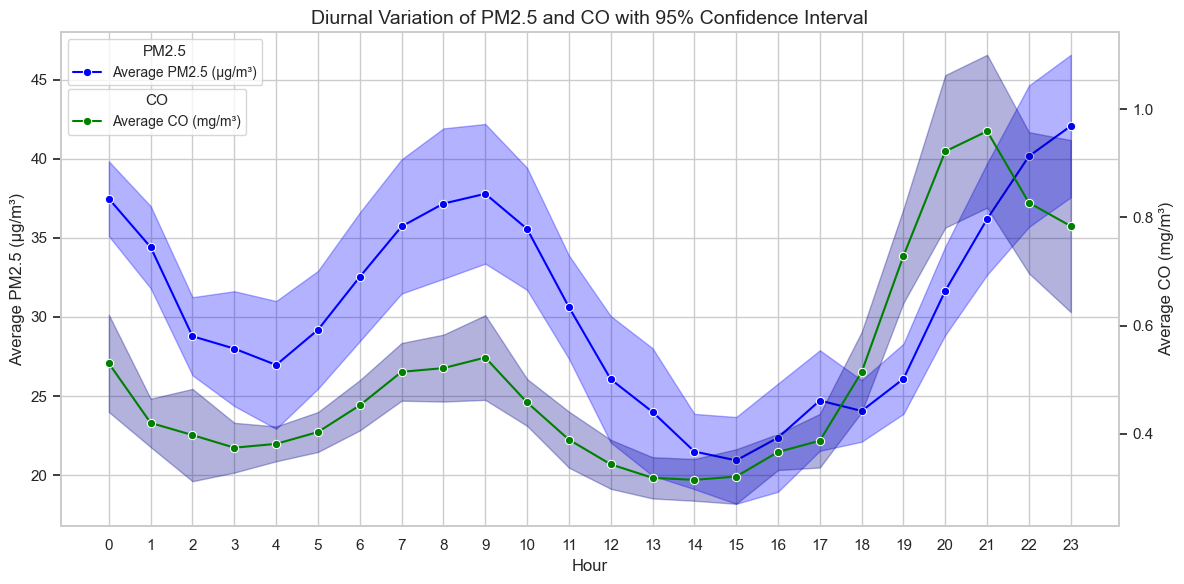

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file and convert 'From Date' to datetime format
df = pd.read_excel(data_path, sheet_name=1)
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define specific dates to filter and convert to date-only format
specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
                                 '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# Filter the DataFrame for the specific dates
mask = df['From Date'].dt.date.isin(specific_dates)
filtered_df = df[mask]

# Extract hour from 'From Date' and create a new column for it
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Group by hour and calculate the mean for PM2.5 and CO
diurnal_variation = filtered_df.groupby('Hour')[['PM2.5', 'CO']].mean().reset_index()

# Calculate the standard deviation for 95% confidence interval
ci_pm25 = 1.96 * filtered_df.groupby('Hour')['PM2.5'].std() / np.sqrt(filtered_df.groupby('Hour')['PM2.5'].count())
ci_co = 1.96 * filtered_df.groupby('Hour')['CO'].std() / np.sqrt(filtered_df.groupby('Hour')['CO'].count())

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 on the first y-axis
sns.lineplot(data=diurnal_variation, x='Hour', y='PM2.5', marker='o', label='Average PM2.5 (µg/m³)', color='blue', ax=ax1)
ax1.fill_between(diurnal_variation['Hour'],
                 diurnal_variation['PM2.5'] - ci_pm25,
                 diurnal_variation['PM2.5'] + ci_pm25,
                 color='blue', alpha=0.3)  # Shaded area for 95% CI
ax1.set_ylabel('Average PM2.5 (µg/m³)', fontsize=12)
ax1.set_xticks(range(0, 24))  # Set x-ticks for hours

# Create a second y-axis for CO
ax2 = ax1.twinx()
sns.lineplot(data=diurnal_variation, x='Hour', y='CO', marker='o', label='Average CO (mg/m³)', color='green', ax=ax2)
ax2.fill_between(diurnal_variation['Hour'],
                 diurnal_variation['CO'] - ci_co,
                 diurnal_variation['CO'] + ci_co,
                 color='#00008B', alpha=0.3)  # Shaded area for 95% CI
ax2.set_ylabel('Average CO (mg/m³)', fontsize=12)

# Add title
plt.title('Diurnal Variation of PM2.5 and CO with 95% Confidence Interval', fontsize=14)

# Add legends for both axes
ax1.legend(loc='upper left', fontsize=10, title='PM2.5', title_fontsize='11')
ax2.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0, 0.9), title='CO', title_fontsize='11')

# Show the plot
plt.grid(False)  # Remove grid if not needed
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\911937867.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\911937867.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\911937867.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

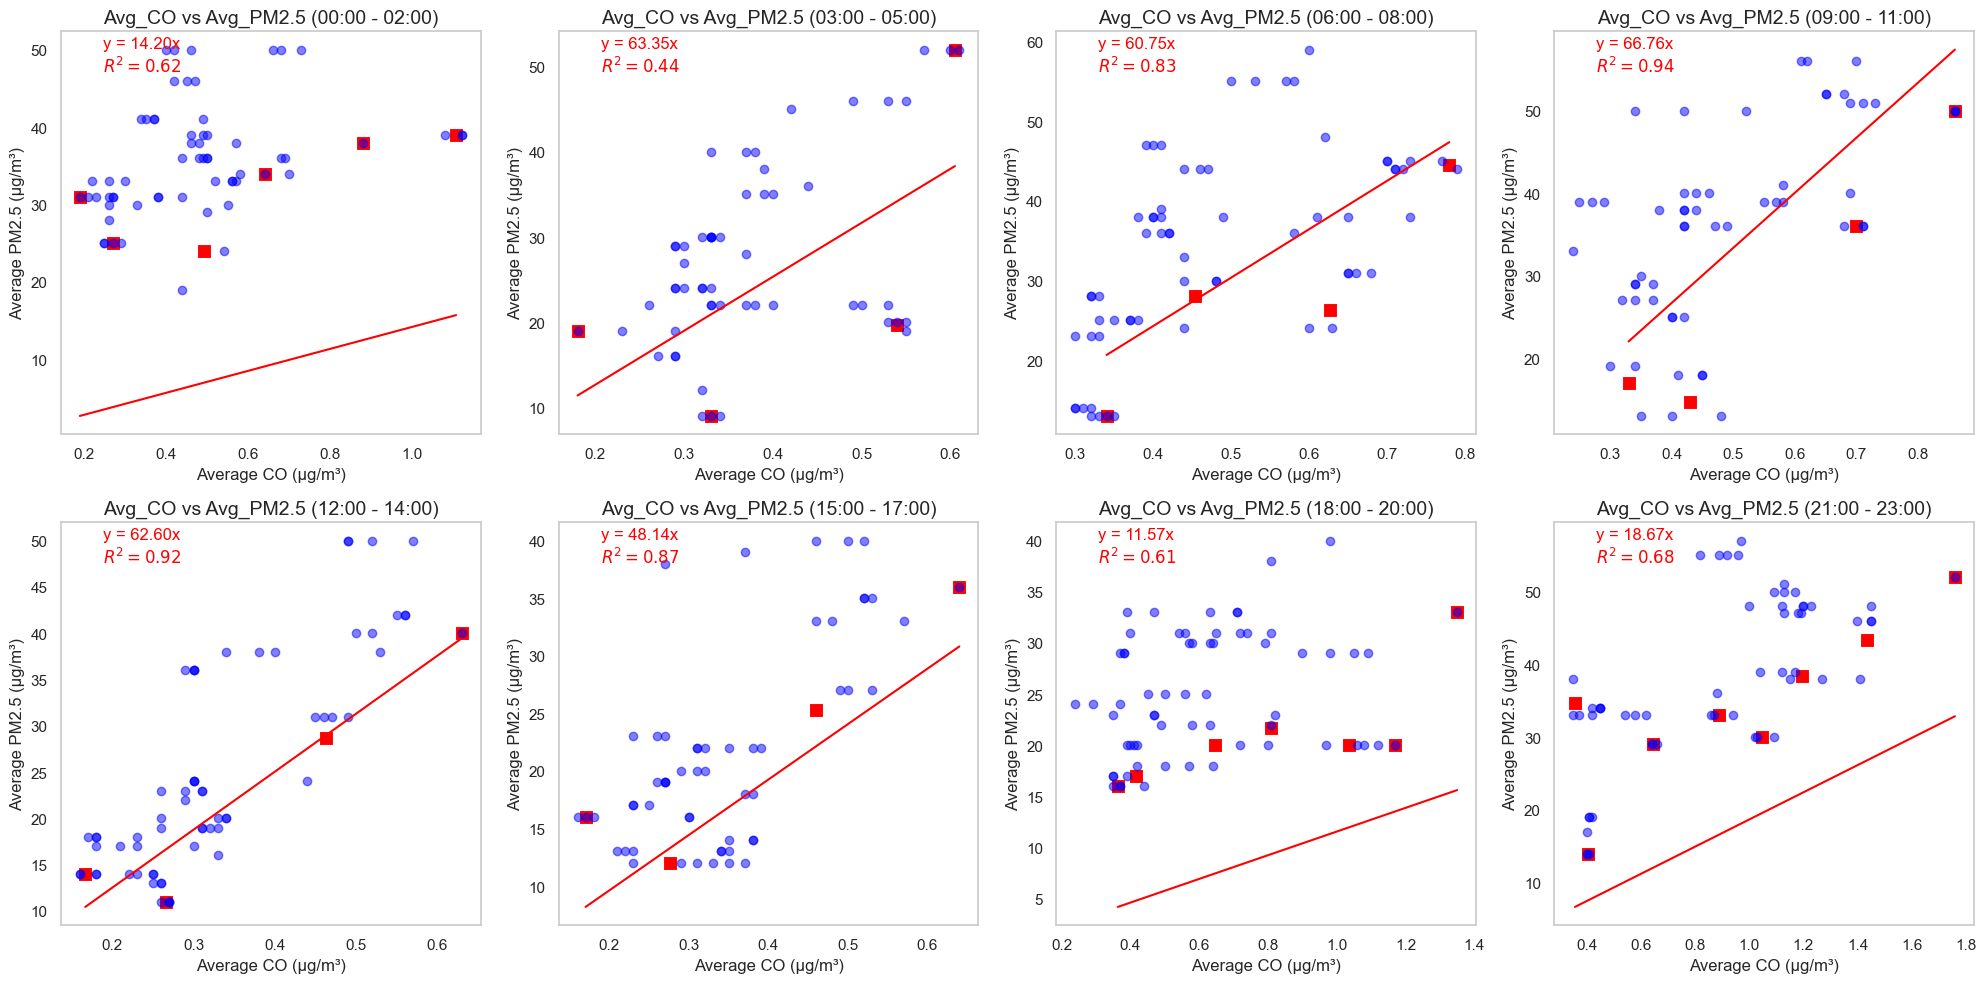

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file and convert 'From Date' to datetime format
df = pd.read_excel(data_path, sheet_name=1)
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define specific dates to filter and convert to date-only format
specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
                                 '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# Define the hour intervals
hour_intervals = [(0, 2), (3, 5), (6, 8), (9, 11), (12, 14), (15, 17), (18, 20), (21, 23)]

# Create a figure and a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each hour interval
for idx, (start_hour, end_hour) in enumerate(hour_intervals):
    # Create mask for filtering specific dates and hour interval
    mask = df['From Date'].dt.date.isin(specific_dates) & \
           (df['From Date'].dt.hour >= start_hour) & (df['From Date'].dt.hour < end_hour)
    filtered_df = df[mask]

    # Drop rows with NaN values in 'CO' and 'PM2.5'
    filtered_df = filtered_df.dropna(subset=['CO', 'PM2.5'])

    # Define CO concentration bins from 0 to 2.1 with 10 equal intervals
    bins = np.linspace(0, 2.1, num=12)  # 11 values create 10 bins
    labels = [f'{bins[i]:.1f}-{bins[i + 1]:.1f}' for i in range(len(bins) - 1)]
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R^2 value
    x = avg_data_cleaned['Avg_CO']
    y = avg_data_cleaned['Avg_PM2.5']
    
    # Get all CO and PM2.5 values for the current interval
    all_x = filtered_df['CO']
    all_y = filtered_df['PM2.5']

    if not x.empty and not y.empty:  # Check if data is available for regression
        slope, _ = np.polyfit(x, y, 1)  # Ignore intercept
        line = slope * x
        r_squared = np.corrcoef(x, y)[0, 1] ** 2

        # Create scatter plot with regression line
        ax = axes[idx]  # Get the current axis for plotting
        sns.scatterplot(x=x, y=y, s=100, color='red', ax=ax,marker='s')  # Plot average scatter on the current axis
        ax.plot(x, line, color='red')  # Plot regression line on the current axis

        # Plot all other PM2.5 and CO values in a different color
        ax.scatter(all_x, all_y, color='#0000ff', alpha=0.5, label='All Data Points')

        # Add title and labels
        ax.set_title(f'Avg_CO vs Avg_PM2.5 ({start_hour:02d}:00 - {end_hour:02d}:00)', fontsize=14)
        ax.set_xlabel('Average CO (µg/m³)', fontsize=12)
        ax.set_ylabel('Average PM2.5 (µg/m³)', fontsize=12)

        # Display the regression slope and R^2 on the plot
        equation_text = f'y = {slope:.2f}x\n$R^2 = {r_squared:.2f}$'
        ax.text(0.1, 0.9, equation_text, transform=ax.transAxes, fontsize=12, color='red')

        # Remove grid from the current axis
        ax.grid(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [90]:
filtered_df['CO'].max()

np.float64(1.76)

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

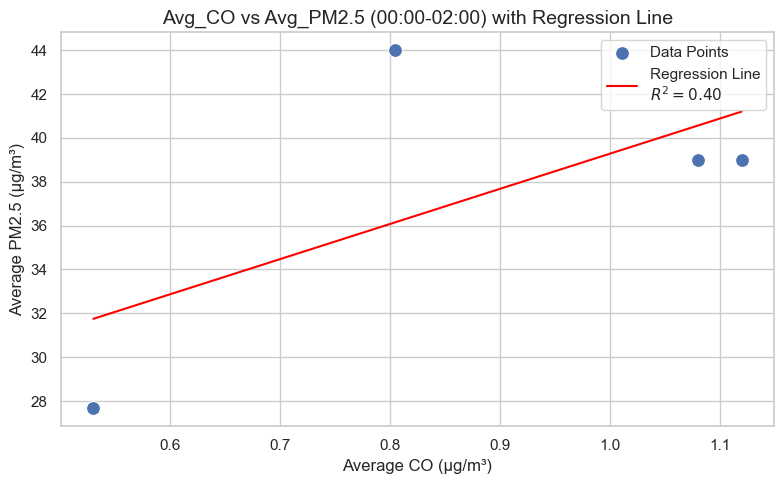

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

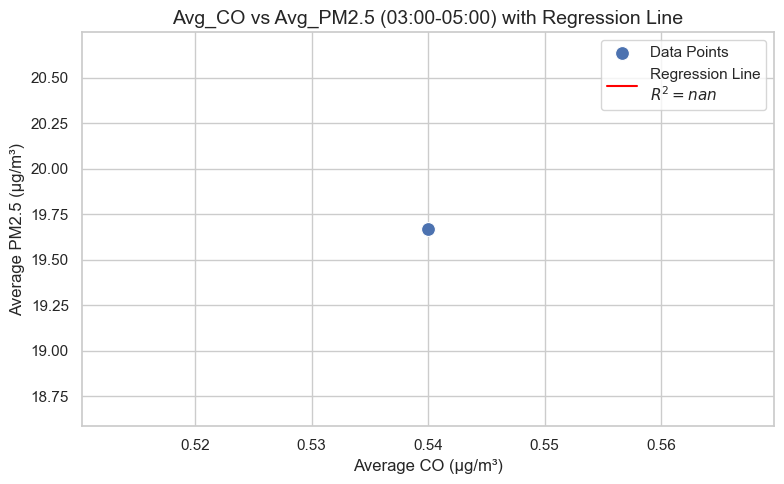

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

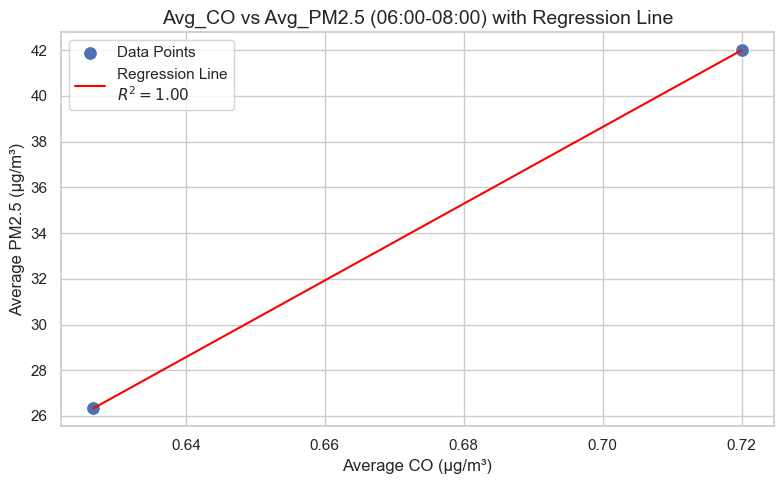

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

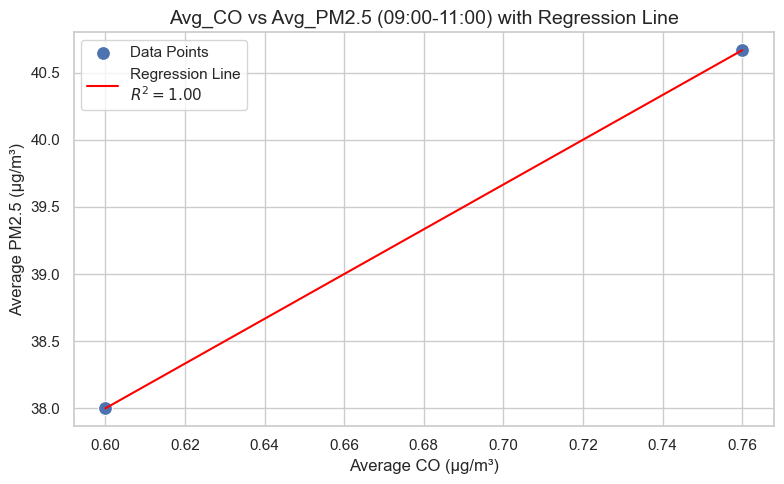

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

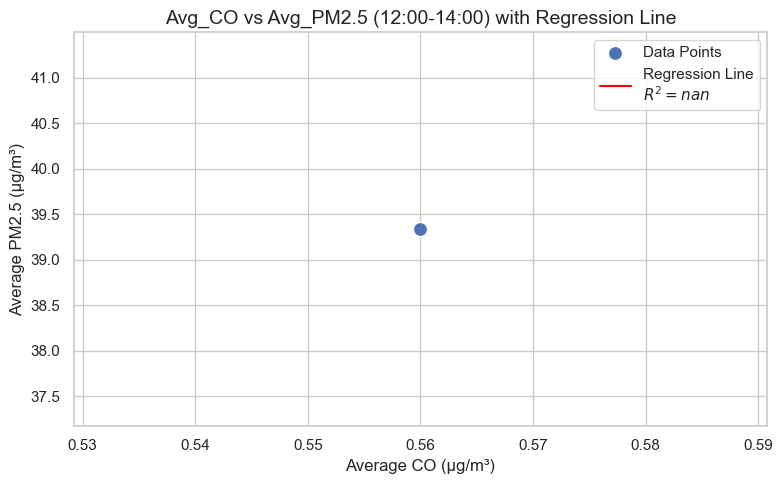

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

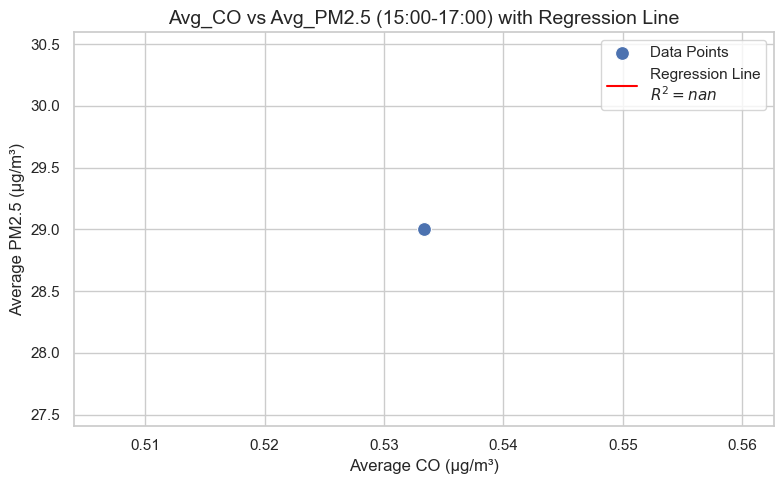

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

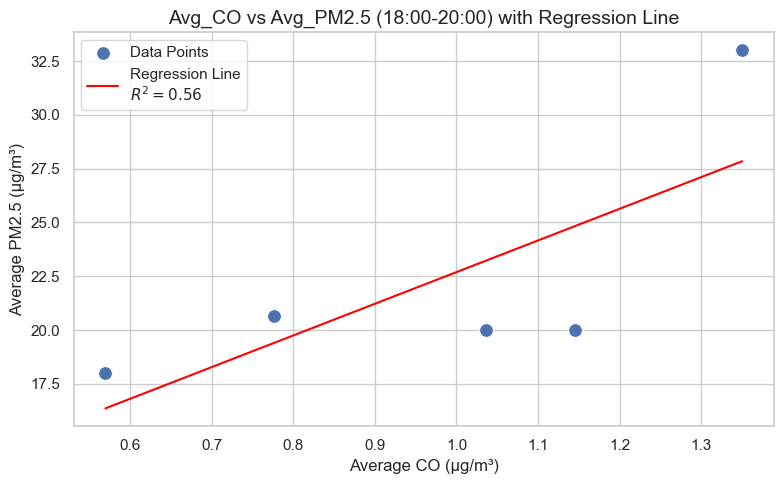

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = filtered_df.groupby('CO_bin').apply(
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2817585773.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future v

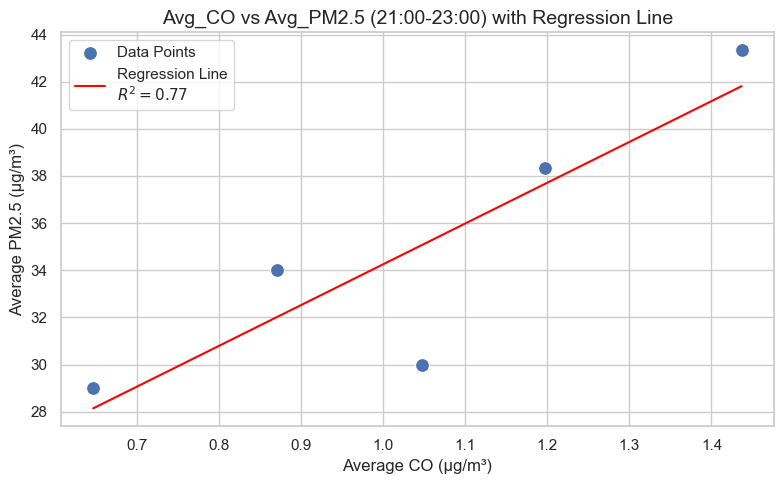

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file and convert 'From Date' to datetime format
df = pd.read_excel(data_path, sheet_name=1)
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define specific dates to filter
specific_dates = pd.to_datetime(['2024-03-02', '2024-03-04', '2024-03-05', '2024-03-06',
                                 '2024-03-09', '2024-03-15', '2024-03-16', '2024-03-26']).date

# Define a function to apply the process for different time intervals
def process_time_interval(df, start_hour, end_hour):
    # Filter the DataFrame for the specific dates and the given time interval
    mask = df['From Date'].dt.date.isin(specific_dates) & \
           (df['From Date'].dt.hour >= start_hour) & (df['From Date'].dt.hour < end_hour)
    filtered_df = df[mask]

    # Define CO concentration bins and create a new column for CO bins
    bins = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7]
    labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]
    filtered_df['CO_bin'] = pd.cut(filtered_df['CO'], bins=bins, labels=labels, include_lowest=True)

    # Group by CO_bin and calculate the average of the smallest 3 PM2.5 concentrations
    avg_data = filtered_df.groupby('CO_bin').apply(
        lambda x: x.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']].mean()).reset_index()

    # Rename columns for clarity
    avg_data.columns = ['CO_bin', 'Avg_CO', 'Avg_PM2.5']

    # Filter out NaN values
    avg_data_cleaned = avg_data.dropna()

    # Calculate the regression line (linear fit) and R^2 value
    x = avg_data_cleaned['Avg_CO']
    y = avg_data_cleaned['Avg_PM2.5']
    slope, intercept = np.polyfit(x, y, 1)
    line = slope * x + intercept
    r_squared = np.corrcoef(x, y)[0, 1] ** 2

    # Create scatter plot with regression line
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x, y=y, s=100, color='b', label='Data Points')
    plt.plot(x, line, color='red', label=f'Regression Line\n$R^2 = {r_squared:.2f}$')

    # Add title and labels
    plt.title(f'Avg_CO vs Avg_PM2.5 ({start_hour:02d}:00-{end_hour:02d}:00) with Regression Line', fontsize=14)
    plt.xlabel('Average CO (µg/m³)', fontsize=12)
    plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)

    # Display legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()

# Apply the function to the specified time intervals
process_time_interval(df, 0, 2)   # 00:00 - 02:00
process_time_interval(df, 3, 5)   # 03:00 - 05:00
process_time_interval(df, 6, 8)   # 06:00 - 08:00
process_time_interval(df, 9, 11)  # 09:00 - 11:00
process_time_interval(df, 12, 14) # 12:00 - 14:00
process_time_interval(df, 15, 17) # 15:00 - 17:00
process_time_interval(df, 18, 20) # 18:00 - 20:00
process_time_interval(df, 21, 23) # 21:00 - 23:00


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3599475763.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour


LinAlgError: SVD did not converge in Linear Least Squares

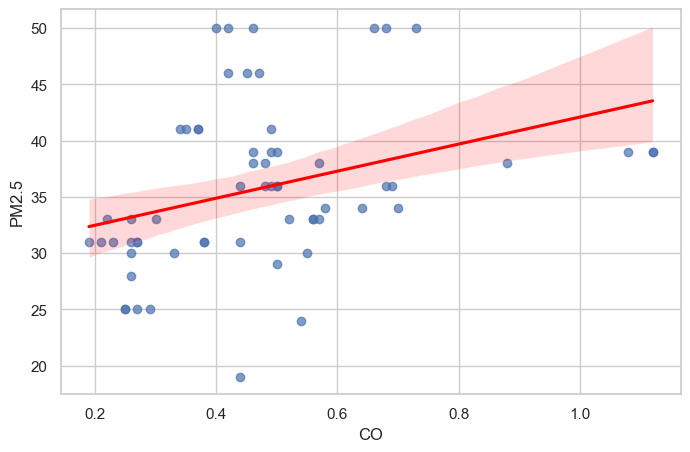

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the specific dates to filter
specific_dates = pd.to_datetime([
    '2024-03-02',
    '2024-03-04',
    '2024-03-05',
    '2024-03-06',
    '2024-03-09',
    '2024-03-15',
    '2024-03-16',
    '2024-03-26'
])

# Filter the DataFrame to get all data points for each specific date
specific_dates_only = specific_dates.date
mask = df['From Date'].dt.date.isin(specific_dates_only)
filtered_df = df[mask]

# Create a new column for the hour of the 'From Date'
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Initialize a dictionary to hold the DataFrames
dfs = {}

# Define the time intervals in hours
time_bins = [
    (0, 2),   # 00:00 - 02:00
    (3, 5),   # 02:00 - 05:00
    (6, 8),   # 05:00 - 08:00
    (9, 11),  # 08:00 - 11:00
    (12, 14), # 11:00 - 14:00
    (15, 17), # 14:00 - 17:00
    (18, 20), # 17:00 - 20:00
    (21, 23)  # 20:00 - 23:00
]

# Create separate DataFrames for each time interval
for start_hour, end_hour in time_bins:
    # Create a mask for the specific time interval
    mask = (filtered_df['Hour'] >= start_hour) & (filtered_df['Hour'] < end_hour)
    dfs[f"{start_hour:02d}-{end_hour:02d}"] = filtered_df[mask]

# Plot PM2.5 vs CO for each time interval with regression line and R^2
for interval, data in dfs.items():
    plt.figure(figsize=(8, 5))
    
    # Only plot if there is enough data
    if len(data) > 0:
        # Fit a regression line using seaborn
        sns.regplot(x='CO', y='PM2.5', data=data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
        
        # Calculate R^2 value
        slope, intercept = np.polyfit(data['CO'], data['PM2.5'], 1)
        r_squared = np.corrcoef(data['CO'], data['PM2.5'])[0, 1]**2
        
        plt.title(f'PM2.5 vs CO for Interval {interval}\n$R^2 = {r_squared:.2f}$')
        plt.xlabel('CO (µg/m³)')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.grid()
        plt.axhline(0, color='grey', lw=0.5, ls='--')
        plt.axvline(0, color='grey', lw=0.5, ls='--')
        plt.xlim(left=0)  # Set x-axis limit to start from 0
        plt.ylim(bottom=0)  # Set y-axis limit to start from 0
        plt.tight_layout()
        plt.savefig(f'PM2.5_vs_CO_{interval}.png')  # Save the plot as PNG
        plt.show()  # Display the plot
    else:
        print(f"No data for interval {interval}, skipping plot.")

# Print the filtered DataFrames for each time interval
print("\nFiltered DataFrames for each time interval:")
for interval, data in dfs.items():
    print(f"\nInterval: {interval}")
    print(data[['From Date', 'CO', 'PM2.5']])  # Print relevant columns


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\3463158680.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hour'] = filtered_df['From Date'].dt.hour


LinAlgError: SVD did not converge in Linear Least Squares

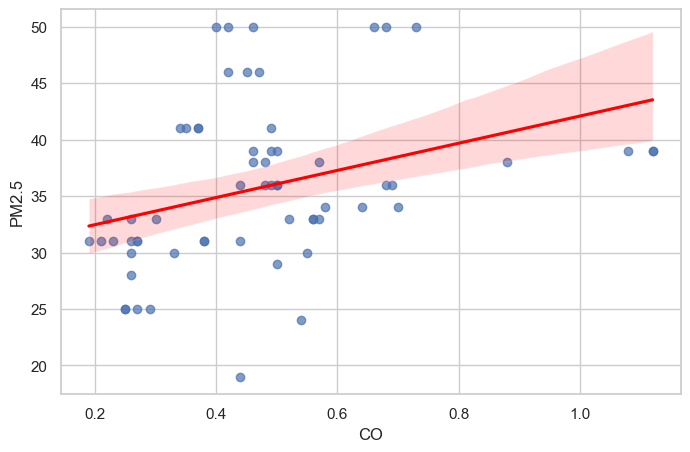

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the Excel file
data_path = r'E:\Phd\Project_Landfill_fires\Data\2024\Ghazipur\Patparganj_2024.xlsx'

# Read the Excel file (assuming the second sheet is indexed as 1)
df = pd.read_excel(data_path, sheet_name=1)

# Convert the 'From Date' column to datetime format
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', dayfirst=True)

# Define the specific dates to filter
specific_dates = pd.to_datetime([
    '2024-03-02',
    '2024-03-04',
    '2024-03-05',
    '2024-03-06',
    '2024-03-09',
    '2024-03-15',
    '2024-03-16',
    '2024-03-26'
])

# Filter the DataFrame to get all data points for each specific date
specific_dates_only = specific_dates.date
mask = df['From Date'].dt.date.isin(specific_dates_only)
filtered_df = df[mask]

# Create a new column for the hour of the 'From Date'
filtered_df['Hour'] = filtered_df['From Date'].dt.hour

# Initialize a dictionary to hold the DataFrames
dfs = {}

# Define the time intervals in hours
time_bins = [
    (0, 2),   # 00:00 - 02:00
    (3, 5),   # 02:00 - 05:00
    (6, 8),   # 05:00 - 08:00
    (9, 11),  # 08:00 - 11:00
    (12, 14), # 11:00 - 14:00
    (15, 17), # 14:00 - 17:00
    (18, 20), # 17:00 - 20:00
    (21, 23)  # 20:00 - 23:00
]

# Create separate DataFrames for each 3-hour interval
for start_hour, end_hour in time_bins:
    # Create a mask for the specific time interval
    mask = (filtered_df['Hour'] >= start_hour) & (filtered_df['Hour'] < end_hour)
    dfs[f"{start_hour:02d}-{end_hour:02d}"] = filtered_df[mask]

# Plot PM2.5 vs CO for each time interval with regression line and R^2
for interval, data in dfs.items():
    plt.figure(figsize=(8, 5))
    
    # Only plot if there is enough data
    if len(data) > 0:
        # Fit a regression line using seaborn
        sns.regplot(x='CO', y='PM2.5', data=data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
        
        # Calculate R^2 value
        slope, intercept = np.polyfit(data['CO'], data['PM2.5'], 1)
        r_squared = np.corrcoef(data['CO'], data['PM2.5'])[0, 1]**2
        
        plt.title(f'PM2.5 vs CO for Interval {interval}\n$R^2 = {r_squared:.2f}$')
        plt.xlabel('CO (µg/m³)')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.grid()
        plt.axhline(0, color='grey', lw=0.5, ls='--')
        plt.axvline(0, color='grey', lw=0.5, ls='--')
        plt.xlim(left=0)  # Set x-axis limit to start from 0
        plt.ylim(bottom=0)  # Set y-axis limit to start from 0
        plt.tight_layout()
        plt.savefig(f'PM2.5_vs_CO_{interval}.png')  # Save the plot as PNG
        plt.show()  # Display the plot
    else:
        print(f"No data for interval {interval}, skipping plot.")


NameError: name 'df_cleaned' is not defined

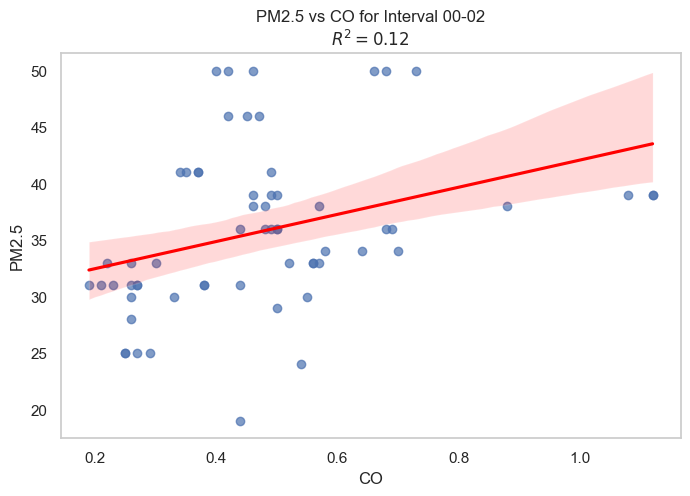

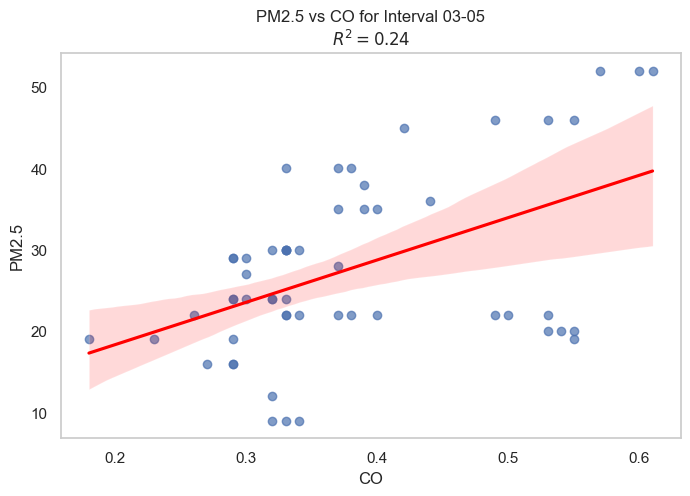

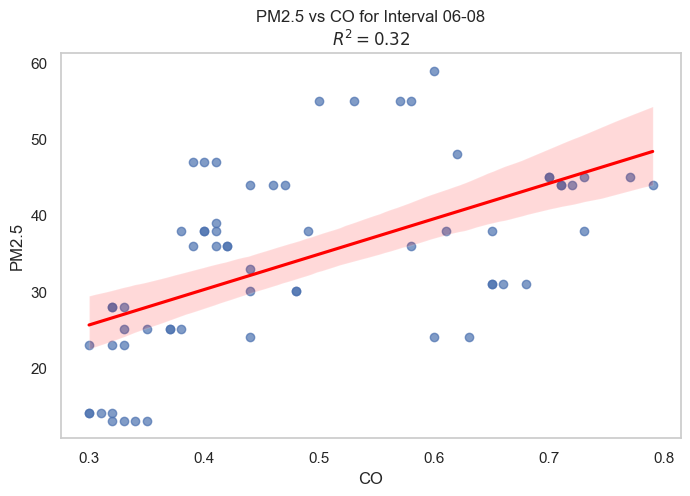

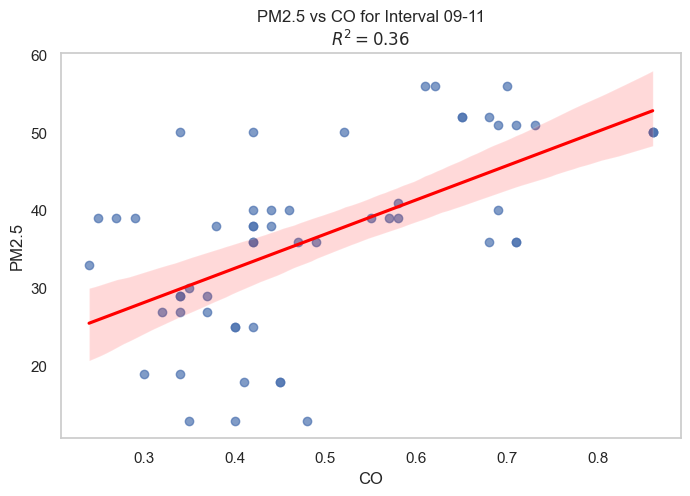

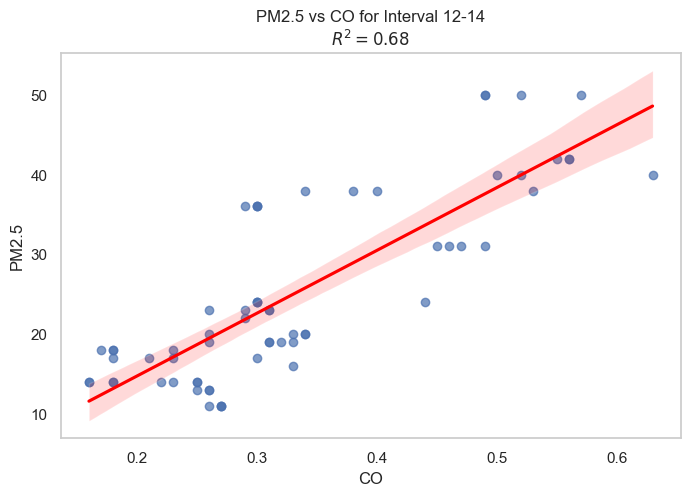

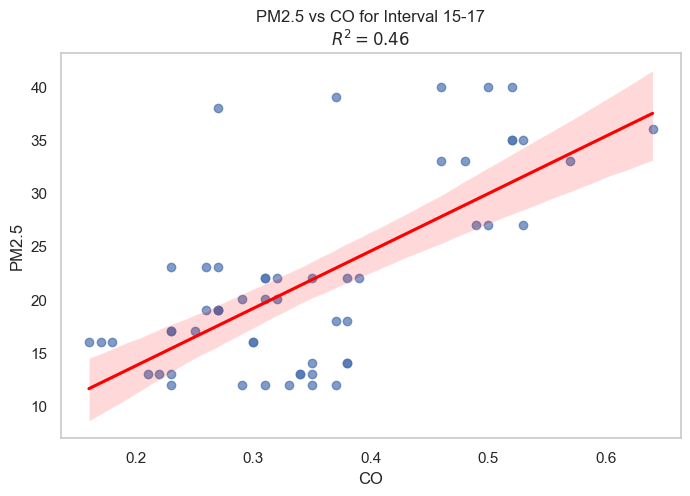

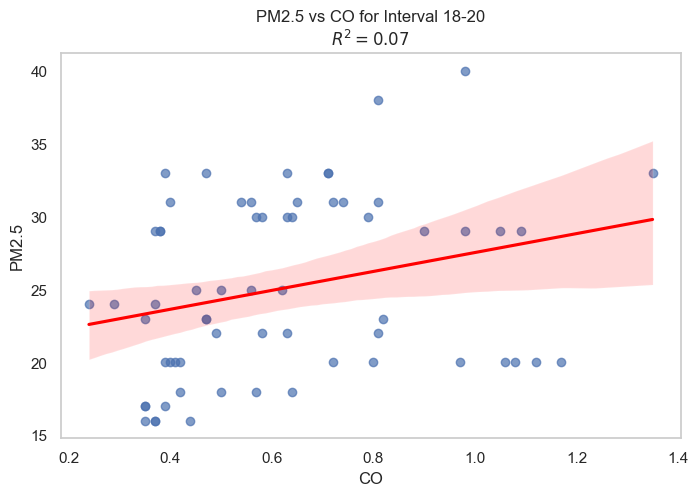

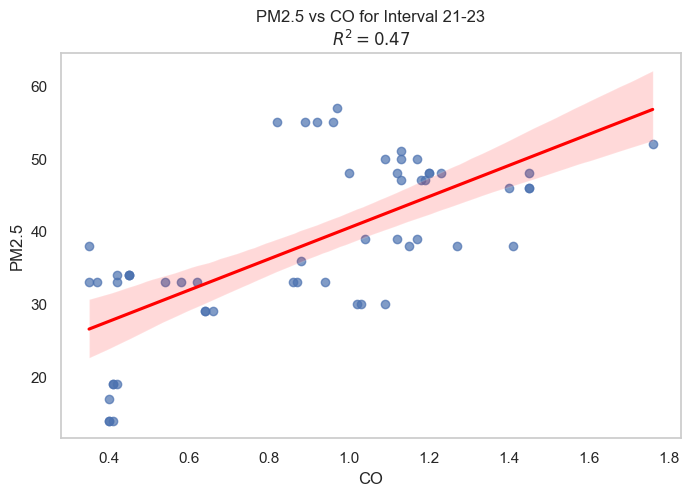

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to clean data and check for sufficient points
def clean_data_and_check(df, x_col, y_col):
    df_cleaned = df[[x_col, y_col]].dropna()  # Remove NaN values
    df_cleaned = df_cleaned[(~np.isinf(df_cleaned[x_col])) & (~np.isinf(df_cleaned[y_col]))]  # Remove Inf values
    return df_cleaned

# Loop through each 3-hour interval DataFrame and plot
for interval, data in dfs.items():
    plt.figure(figsize=(8, 5))
    
    # Clean data by removing NaN or Inf values
    data_cleaned = clean_data_and_check(data, 'CO', 'PM2.5')
    
    # Ensure there are enough data points to perform regression
    if len(data_cleaned) >= 2:
        # Fit a regression line using seaborn
        sns.regplot(x='CO', y='PM2.5', data=data_cleaned, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
        
        # Calculate R² value
        slope, intercept = np.polyfit(data_cleaned['CO'], data_cleaned['PM2.5'], 1)
        r_squared = np.corrcoef(data_cleaned['CO'], data_cleaned['PM2.5'])[0, 1]**2
        
        # Set plot title with R²
        plt.title(f'PM2.5 vs CO for Interval {interval}\n$R^2 = {r_squared:.2f}$')
        plt.xlabel('CO')
        plt.ylabel('PM2.5')
        plt.grid(False)  # If you prefer no grid
        plt.show()
    else:
        print(f"Not enough valid data for interval {interval} to perform regression.")


In [52]:
data_cleaned

CO  PM2.5
5940  0.41   19.0
5941  0.41   19.0
5942  0.42   19.0
5944  0.41   14.0
5945  0.40   14.0
5946  0.40   14.0
5947  0.40   17.0
6132  0.62   33.0
6133  0.58   33.0
6134  0.54   33.0
6136  0.45   34.0
6137  0.42   34.0
6138  0.45   34.0
6139  0.45   34.0
6228  0.66   29.0
6229  0.64   29.0
6230  0.64   29.0
6232  0.42   33.0
6233  0.37   33.0
6234  0.35   33.0
6235  0.35   38.0
6324  1.13   47.0
6325  1.18   47.0
6326  1.19   47.0
6328  0.82   55.0
6329  0.92   55.0
6330  0.96   55.0
6331  0.97   57.0
6612  1.15   38.0
6613  1.27   38.0
6614  1.41   38.0
6616  1.23   48.0
6617  1.12   48.0
6618  1.00   48.0
6619  0.89   55.0
7188  1.09   30.0
7189  1.02   30.0
7190  1.03   30.0
7192  0.94   33.0
7193  0.87   33.0
7194  0.86   33.0
7195  0.88   36.0
7284  1.17   39.0
7285  1.12   39.0
7286  1.04   39.0
7288  1.09   50.0
7289  1.13   50.0
7290  1.17   50.0
7291  1.13   51.0
8244  1.45   46.0
8245  1.45   46.0
8246  1.40   46.0
8248  1.20   48.0
8249  1.20   48.0
8250  1.45   48.0
8251  1.76   52.0

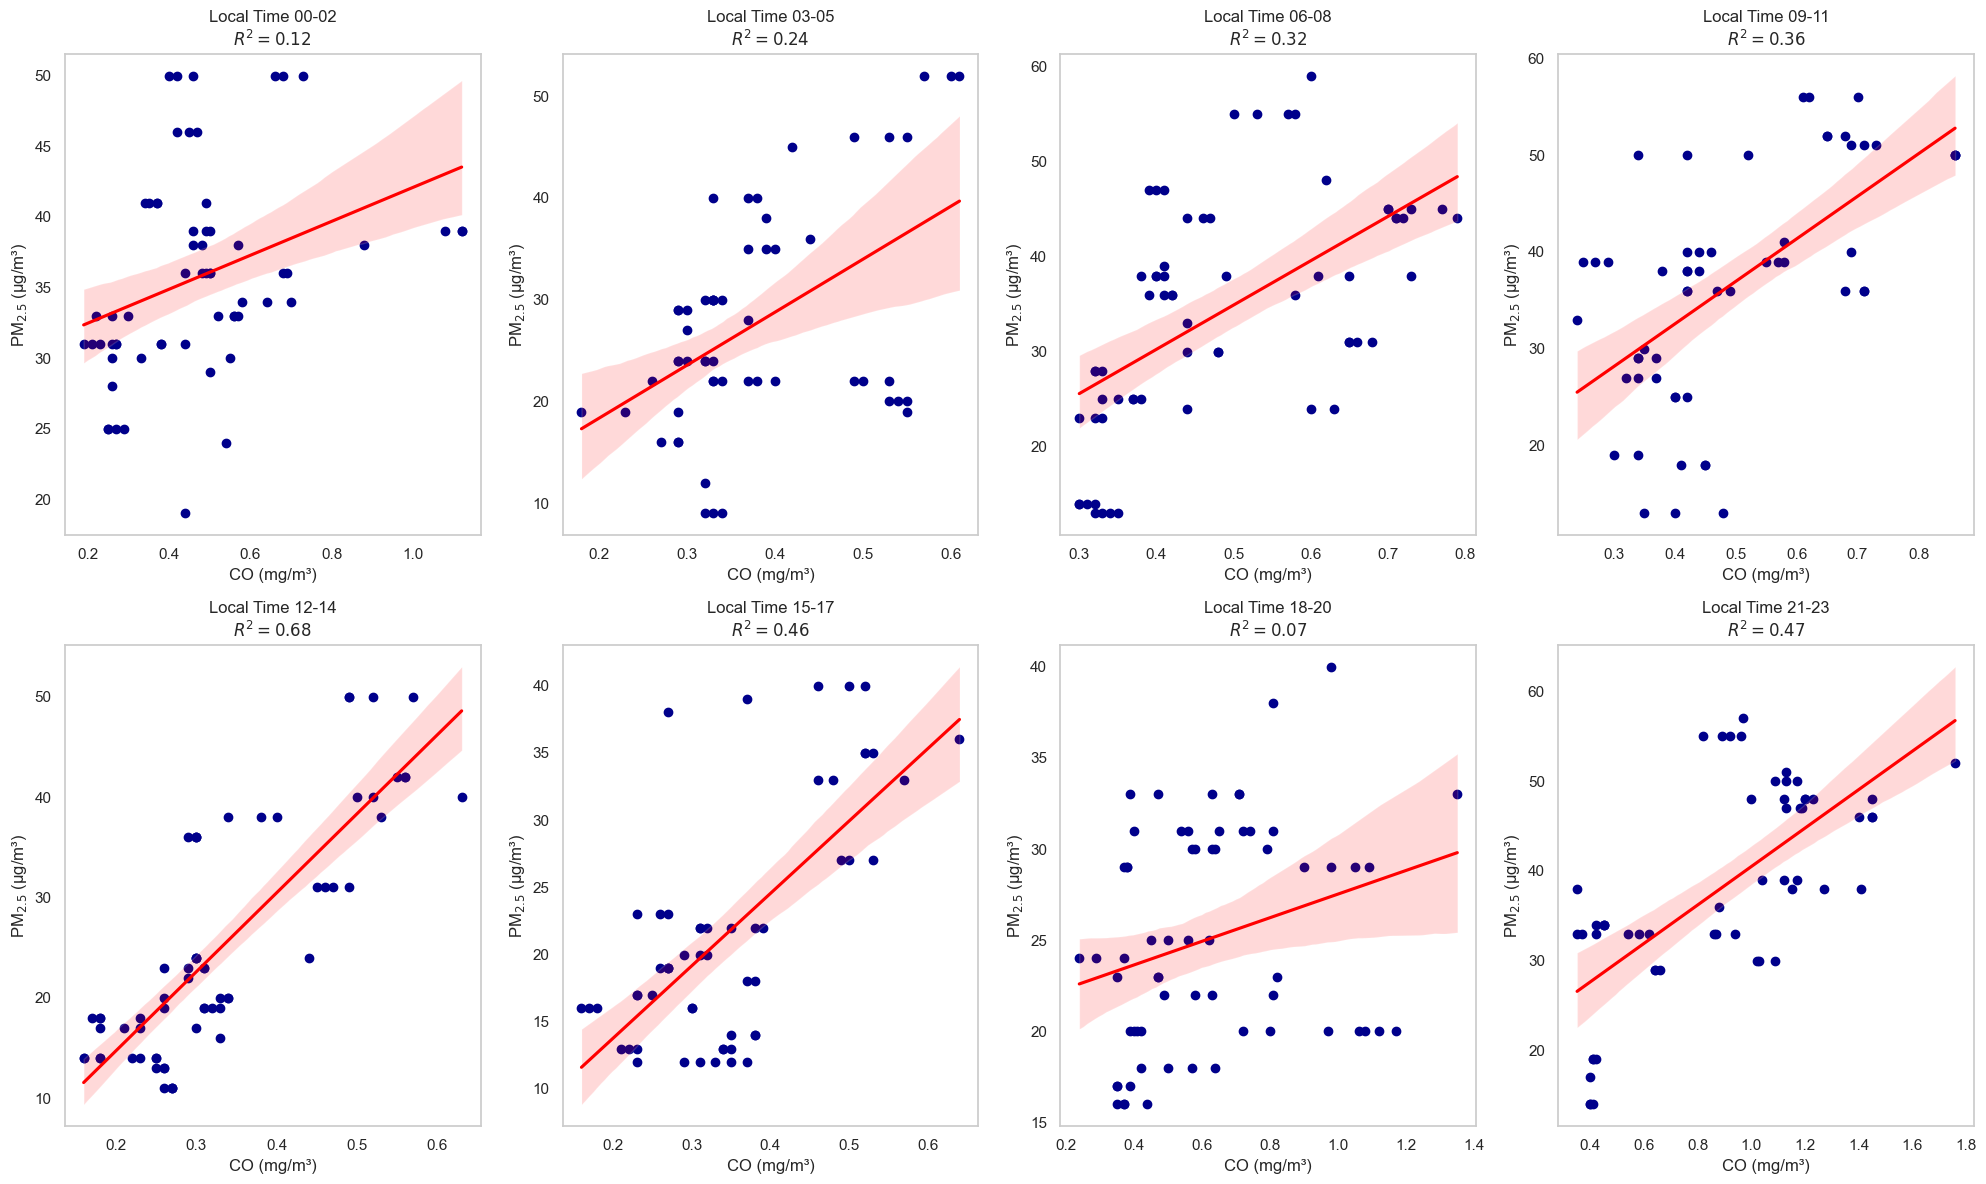

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'dfs' is a dictionary where keys are interval labels (e.g., '0-2', '2-5', etc.) 
# and values are the DataFrames for each time interval.

# Create a figure with 8 subplots (4 rows, 2 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()  # Flatten to easily access subplots with a single index

# Function to clean data and check for sufficient points
def clean_data_and_check(df, x_col, y_col):
    df_cleaned = df[[x_col, y_col]].dropna()  # Remove NaN values
    df_cleaned = df_cleaned[(~np.isinf(df_cleaned[x_col])) & (~np.isinf(df_cleaned[y_col]))]  # Remove Inf values
    return df_cleaned

# Loop through each 3-hour interval DataFrame and plot in subplots
for i, (interval, data) in enumerate(dfs.items()):
    # Clean data
    data_cleaned = clean_data_and_check(data, 'CO', 'PM2.5')
    
    # Plot only if there are enough valid data points
    if len(data_cleaned) >= 2:
        sns.regplot(x='CO', y='PM2.5', data=data_cleaned, scatter_kws={'alpha': 1, 'color': 'darkblue'}, line_kws={'color': 'red'}, ax=axes[i])
        
        # Calculate R² value
        slope, intercept = np.polyfit(data_cleaned['CO'], data_cleaned['PM2.5'], 1)
        r_squared = np.corrcoef(data_cleaned['CO'], data_cleaned['PM2.5'])[0, 1]**2
        
        # Set plot title with R²
        axes[i].set_title(f'Local Time {interval}\n$R^2 = {r_squared:.2f}$')
        axes[i].set_ylabel('PM$_{2.5}$ (µg/m³)')
        axes[i].grid(False)

    else:
        axes[i].set_title(f'Not enough valid data for interval {interval} to perform regression.')
        axes[i].set_ylabel('PM2.5 (µg/m³)')
        axes[i].grid(False)


# Set common x-label for all subplots
for ax in axes:
    ax.set_xlabel('CO (mg/m³)')


plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [48]:
labels

['0.5-0.7', '0.7-0.9', '0.9-1.1', '1.1-1.3', '1.3-1.5', '1.5-1.7']

C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2537938617.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin')['PM2.5'].apply(lambda x: x.nsmallest(3).mean()).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2537938617.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin')['PM2.5'].apply(lambda x: x.nsmallest(3).mean()).reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\2537938617.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

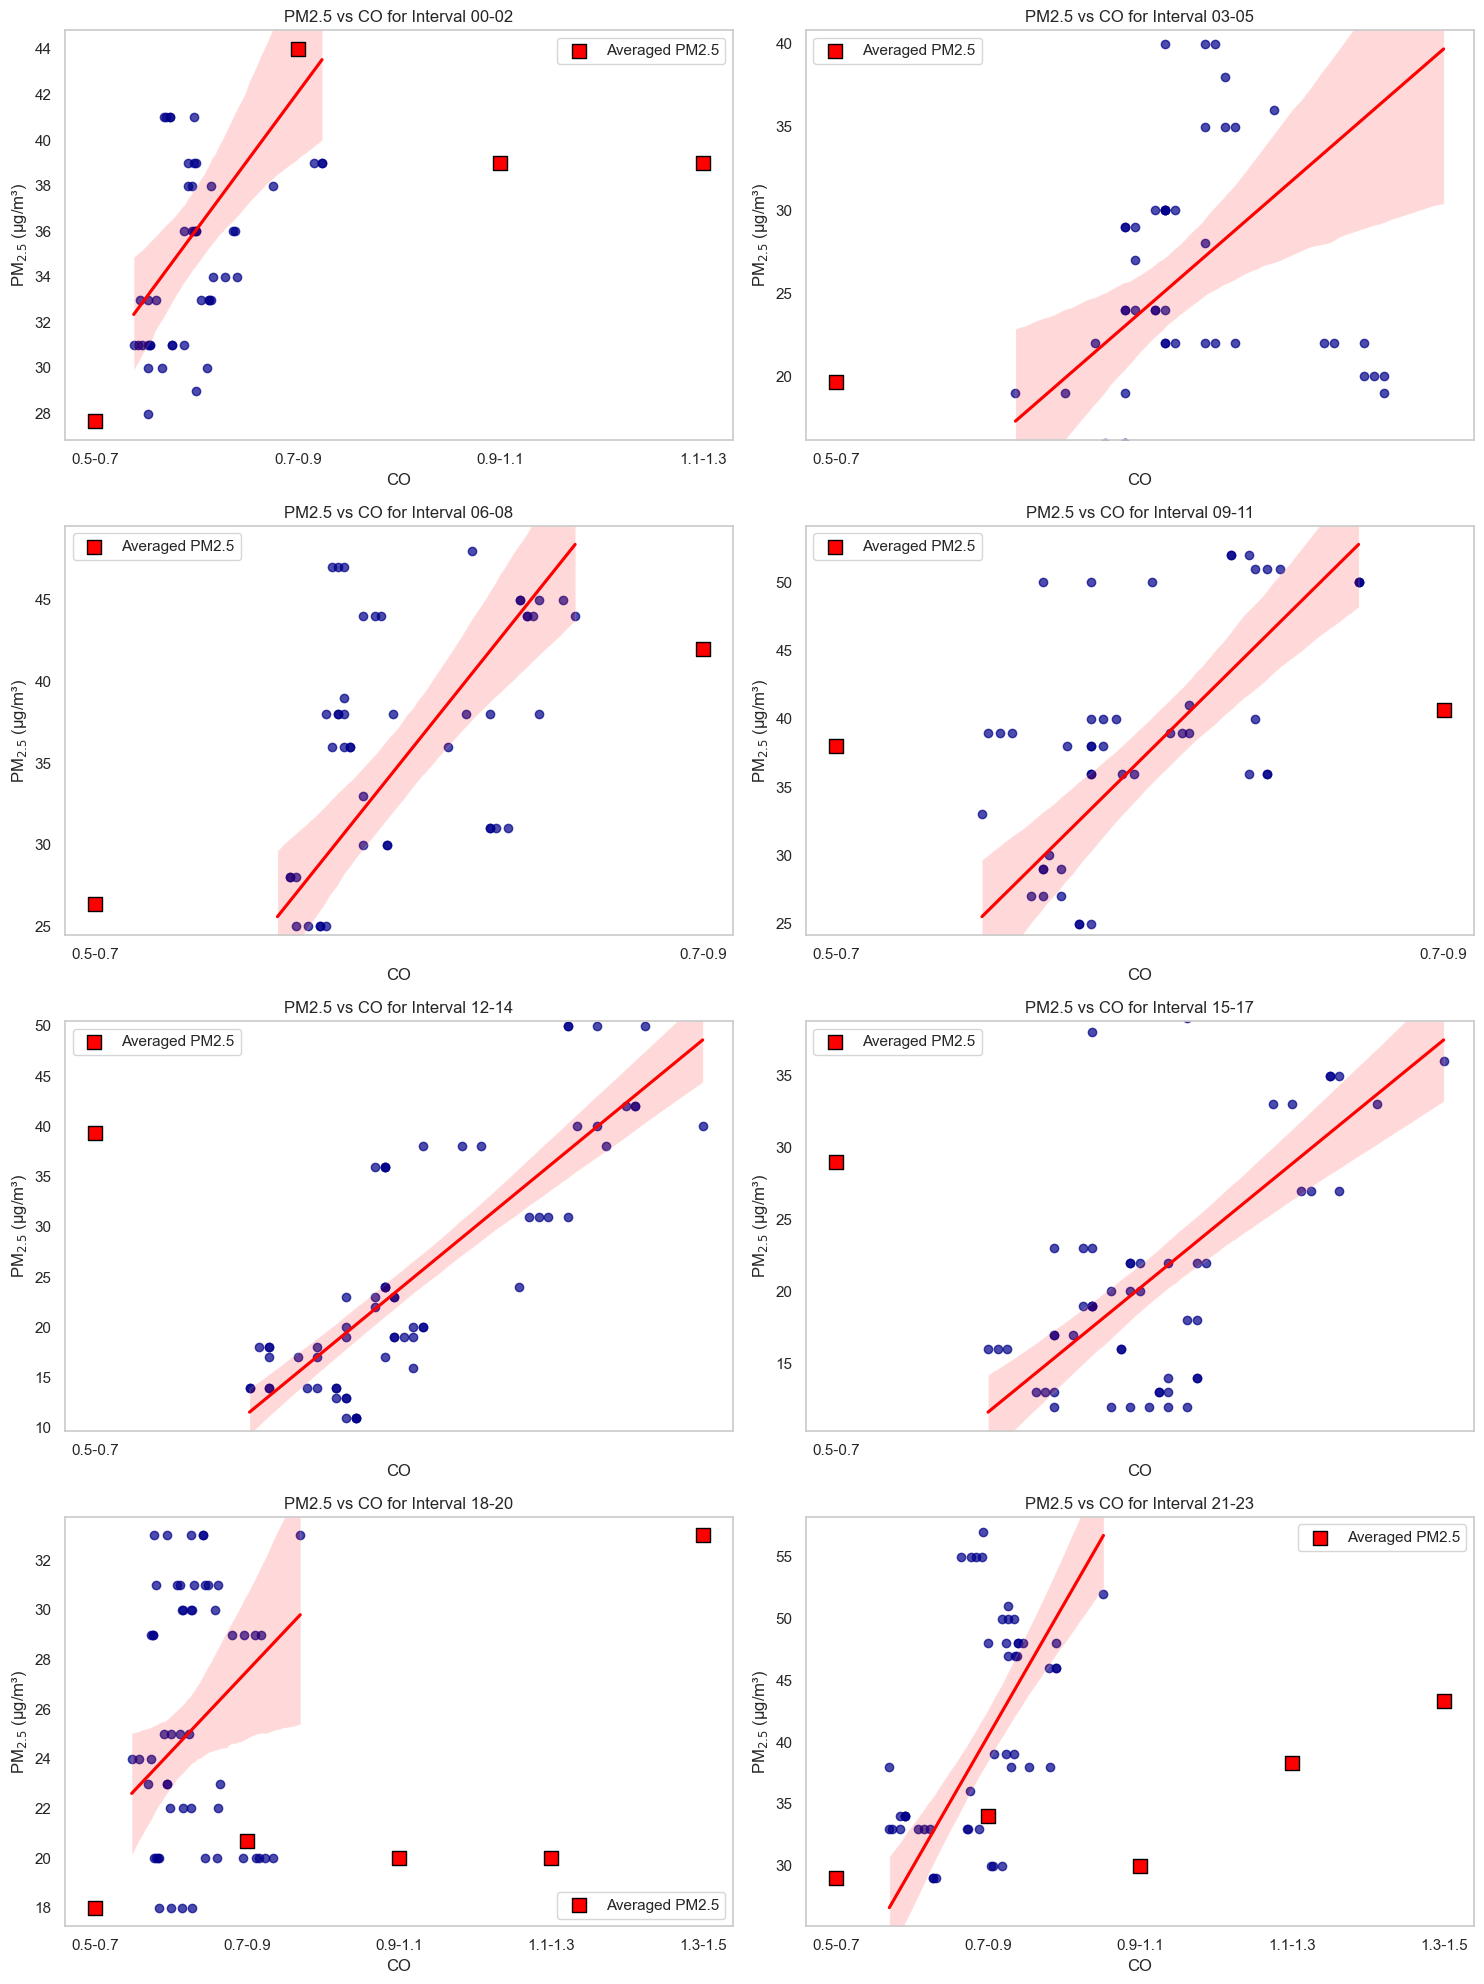


Minimum 3 PM2.5 values with corresponding CO values for each interval:

Interval: 00-02
  CO PM2.5 (µg/m³)
0.44          19.0
0.54          24.0
0.29          25.0

Interval: 03-05
  CO PM2.5 (µg/m³)
0.34           9.0
0.33           9.0
0.32           9.0

Interval: 06-08
  CO PM2.5 (µg/m³)
0.35          13.0
0.34          13.0
0.33          13.0

Interval: 09-11
  CO PM2.5 (µg/m³)
0.48          13.0
0.40          13.0
0.35          13.0

Interval: 12-14
  CO PM2.5 (µg/m³)
0.26          11.0
0.27          11.0
0.27          11.0

Interval: 15-17
  CO PM2.5 (µg/m³)
0.23          12.0
0.29          12.0
0.31          12.0

Interval: 18-20
  CO PM2.5 (µg/m³)
0.44          16.0
0.35          16.0
0.37          16.0

Interval: 21-23
  CO PM2.5 (µg/m³)
0.41          14.0
0.40          14.0
0.40          14.0


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dfs' contains the data for each interval as before
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 8 subplots
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

# Define CO concentration bins
bins = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Create a list to store results for all intervals
all_intervals_results = []

# Loop through each 3-hour interval DataFrame and plot in subplots
for i, (interval, data) in enumerate(dfs.items()):
    # Clean data
    data_cleaned = clean_data_and_check(data, 'CO', 'PM2.5')
    
    # Calculate averages for the lowest 3 PM2.5 observations within CO bins
    data_cleaned['CO_bin'] = pd.cut(data_cleaned['CO'], bins=bins, labels=labels, include_lowest=True)
    
    # Get minimum 3 PM2.5 values and corresponding CO values
    min_pm25_data = data_cleaned.nsmallest(3, 'PM2.5')[['CO', 'PM2.5']]
    
    # Append results to the list
    all_intervals_results.append((interval, min_pm25_data))
    
    # Plot the regression line
    sns.regplot(x='CO', y='PM2.5', data=data_cleaned, 
                scatter_kws={'alpha': 0.7, 'color': 'darkblue'}, 
                line_kws={'color': 'red'}, ax=axes[i])

    # Plot the averaged points for the lowest 3 PM2.5 observations within CO bins
    avg_data = data_cleaned.groupby('CO_bin')['PM2.5'].apply(lambda x: x.nsmallest(3).mean()).reset_index()
    axes[i].scatter(avg_data['CO_bin'], avg_data['PM2.5'], color='red', marker='s', s=100, label='Averaged PM2.5', edgecolor='black')

    # Set titles and labels
    axes[i].set_title(f'PM2.5 vs CO for Interval {interval}')
    axes[i].set_ylabel('PM$_{2.5}$ (µg/m³)')
    axes[i].legend()
    
    # Remove grid lines
    axes[i].grid(False)

plt.tight_layout()
plt.show()

# Print all intervals' minimum 3 PM2.5 and corresponding CO values
print("\nMinimum 3 PM2.5 values with corresponding CO values for each interval:")
for interval, min_data in all_intervals_results:
    print(f"\nInterval: {interval}")
    print(min_data.to_string(index=False, header=["CO", "PM2.5 (µg/m³)"]))


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:34: Futur


Interval: 00-02
 CO Bin Mean PM2.5 (µg/m³) Mean CO
0.5-0.7          27.666667   0.530
0.7-0.9          44.000000   0.805
0.9-1.1          39.000000   1.080
1.1-1.3          39.000000   1.120
1.3-1.5                NaN     NaN
1.5-1.7                NaN     NaN

Interval: 03-05
 CO Bin Mean PM2.5 (µg/m³) Mean CO
0.5-0.7          19.666667    0.54
0.7-0.9                NaN     NaN
0.9-1.1                NaN     NaN
1.1-1.3                NaN     NaN
1.3-1.5                NaN     NaN
1.5-1.7                NaN     NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:34: Futur


Interval: 06-08
 CO Bin Mean PM2.5 (µg/m³)  Mean CO
0.5-0.7          26.333333 0.626667
0.7-0.9          42.000000 0.720000
0.9-1.1                NaN      NaN
1.1-1.3                NaN      NaN
1.3-1.5                NaN      NaN
1.5-1.7                NaN      NaN

Interval: 09-11
 CO Bin Mean PM2.5 (µg/m³) Mean CO
0.5-0.7          38.000000    0.60
0.7-0.9          40.666667    0.76
0.9-1.1                NaN     NaN
1.1-1.3                NaN     NaN
1.3-1.5                NaN     NaN
1.5-1.7                NaN     NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:34: Futur


Interval: 12-14
 CO Bin Mean PM2.5 (µg/m³) Mean CO
0.5-0.7          39.333333    0.56
0.7-0.9                NaN     NaN
0.9-1.1                NaN     NaN
1.1-1.3                NaN     NaN
1.3-1.5                NaN     NaN
1.5-1.7                NaN     NaN

Interval: 15-17
 CO Bin Mean PM2.5 (µg/m³)  Mean CO
0.5-0.7               29.0 0.533333
0.7-0.9                NaN      NaN
0.9-1.1                NaN      NaN
1.1-1.3                NaN      NaN
1.3-1.5                NaN      NaN
1.5-1.7                NaN      NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_54948\4150128577.py:34: Futur


Interval: 18-20
 CO Bin Mean PM2.5 (µg/m³)  Mean CO
0.5-0.7          18.000000 0.570000
0.7-0.9          20.666667 0.776667
0.9-1.1          20.000000 1.036667
1.1-1.3          20.000000 1.145000
1.3-1.5          33.000000 1.350000
1.5-1.7                NaN      NaN

Interval: 21-23
 CO Bin Mean PM2.5 (µg/m³)  Mean CO
0.5-0.7          29.000000 0.646667
0.7-0.9          34.000000 0.870000
0.9-1.1          30.000000 1.046667
1.1-1.3          38.333333 1.196667
1.3-1.5          43.333333 1.436667
1.5-1.7                NaN      NaN


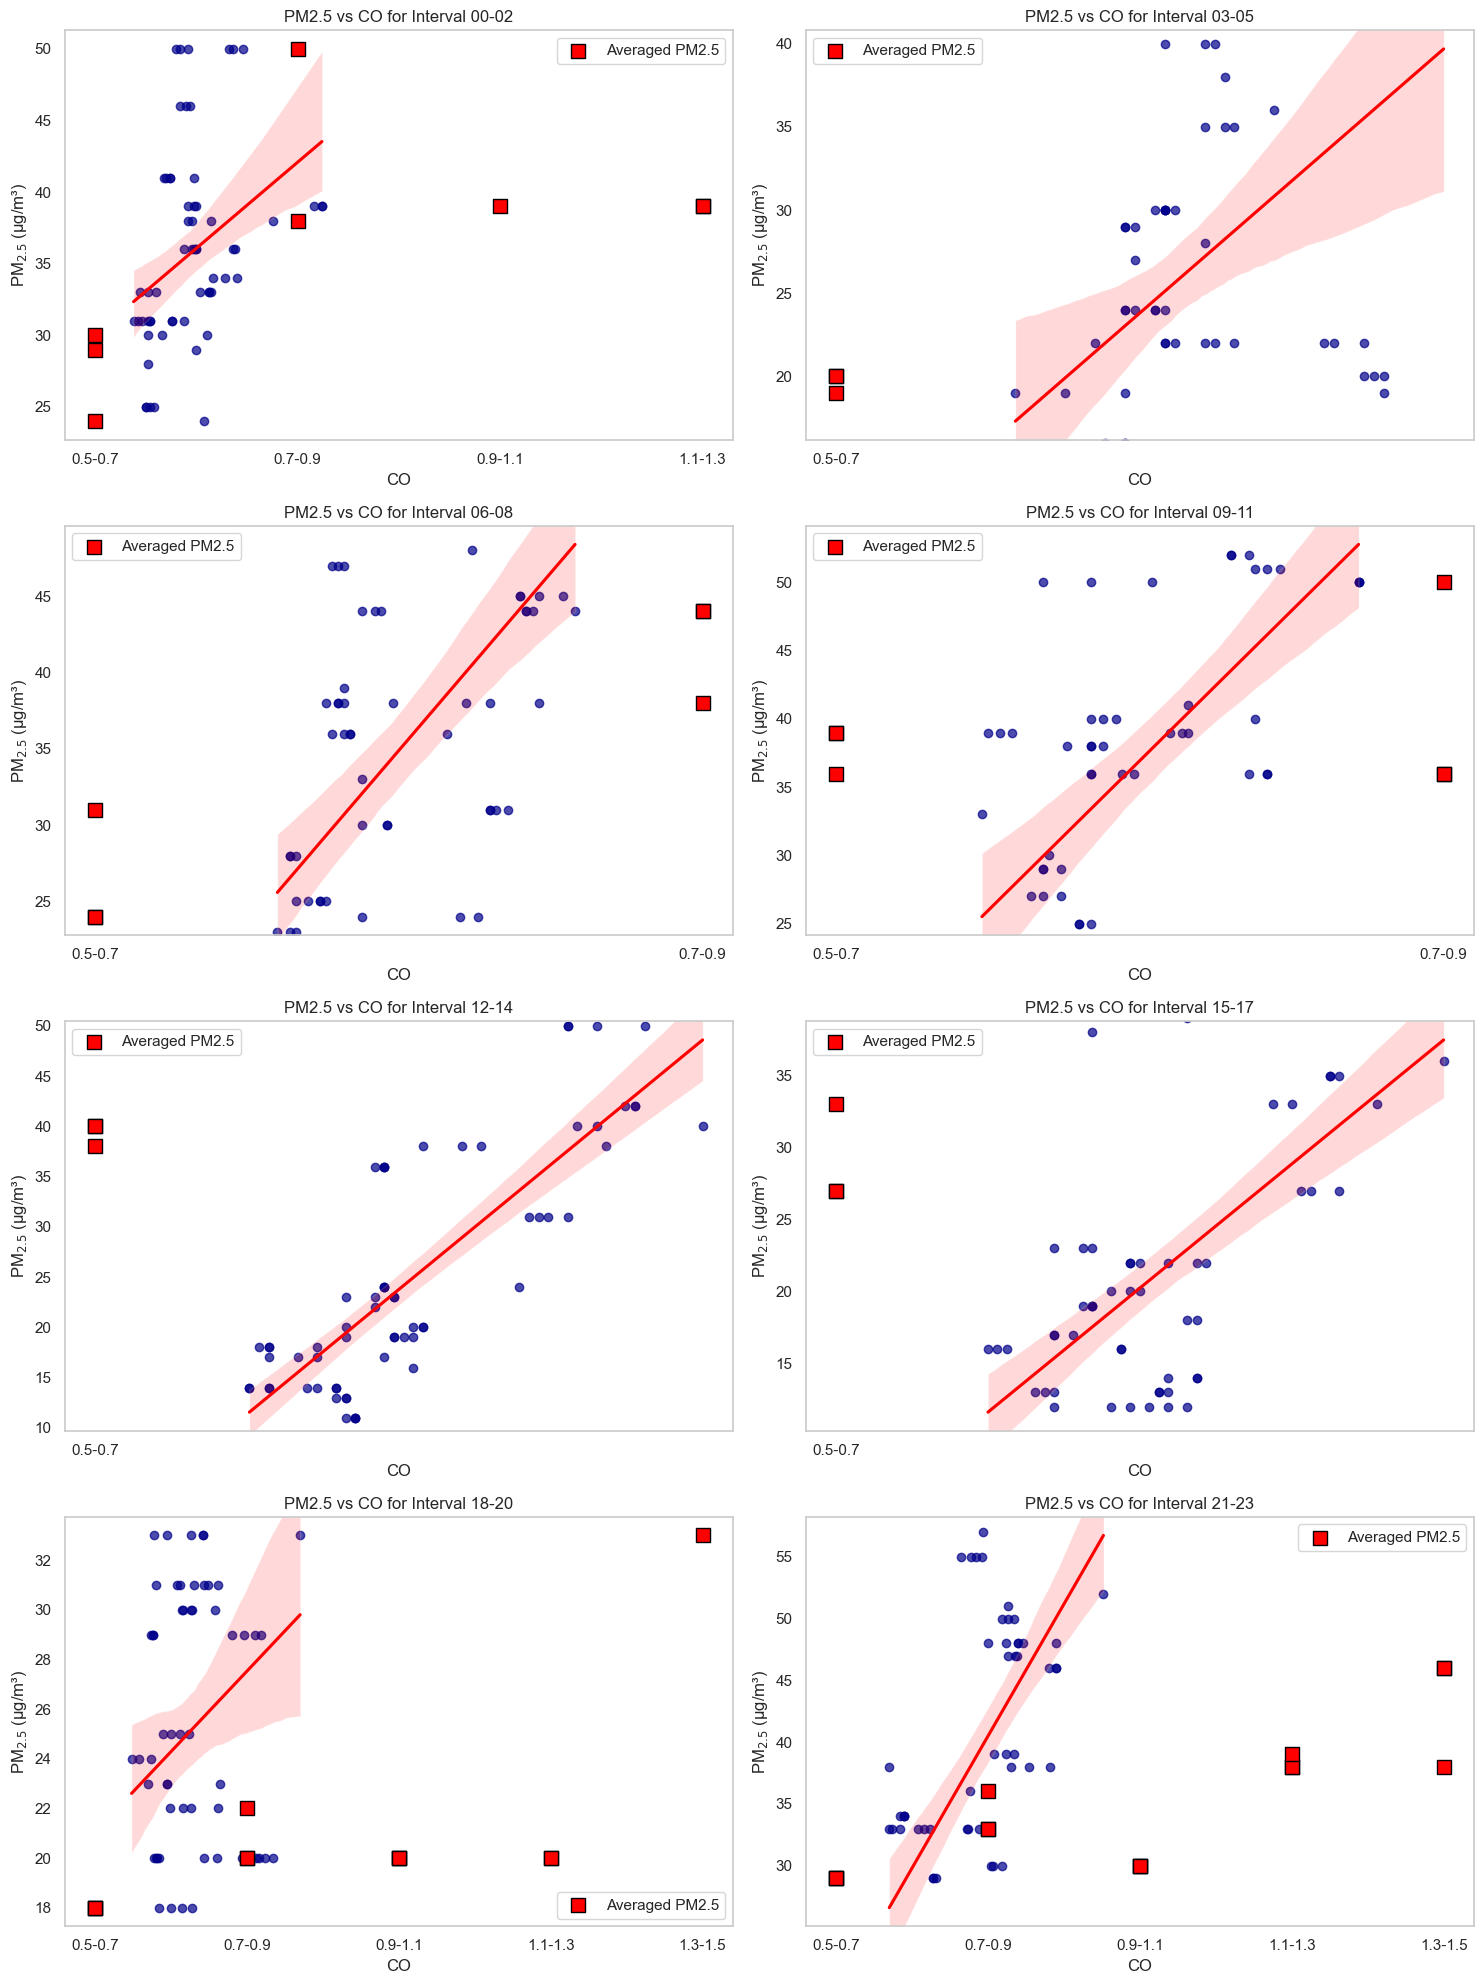

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dfs' contains the data for each interval as before
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 8 subplots
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

# Define CO concentration bins
bins = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7]
labels = [f'{bins[i]}-{bins[i + 1]}' for i in range(len(bins) - 1)]

# Loop through each 3-hour interval DataFrame and plot in subplots
for i, (interval, data) in enumerate(dfs.items()):
    # Clean data
    data_cleaned = clean_data_and_check(data, 'CO', 'PM2.5')
    
    # Plot the regression line
    sns.regplot(x='CO', y='PM2.5', data=data_cleaned, 
                scatter_kws={'alpha': 0.7, 'color': 'darkblue'}, 
                line_kws={'color': 'red'}, ax=axes[i])

    # Calculate averages for the lowest 3 PM2.5 observations within CO bins
    data_cleaned['CO_bin'] = pd.cut(data_cleaned['CO'], bins=bins, labels=labels, include_lowest=True)
    
    # Find the three smallest PM2.5 values and their corresponding CO values in each bin
    avg_data = data_cleaned.groupby('CO_bin').apply(lambda x: x.nsmallest(3, 'PM2.5')).reset_index(drop=True)

    # Calculate PM2.5/CO ratios
    avg_data['PM2.5/CO'] = avg_data['PM2.5'] / avg_data['CO']
    
    # Calculate mean PM2.5 and CO for each bin
    mean_values = avg_data.groupby('CO_bin').agg({'PM2.5': 'mean', 'CO': 'mean'}).reset_index()
    
    # Print the bins and mean PM2.5/CO ratios in table format
    print(f"\nInterval: {interval}")
    print(mean_values.to_string(index=False, header=["CO Bin", "Mean PM2.5 (µg/m³)", "Mean CO"]))

    # Plot the averaged points
    axes[i].scatter(avg_data['CO_bin'], avg_data['PM2.5'], color='red', marker='s', s=100, label='Averaged PM2.5', edgecolor='black')

    # Set titles and labels
    axes[i].set_title(f'PM2.5 vs CO for Interval {interval}')
    axes[i].set_ylabel('PM$_{2.5}$ (µg/m³)')
    axes[i].legend()
    
    # Remove grid lines
    axes[i].grid(False)

plt.tight_layout()
plt.show()
